In [1]:
import sys
sys.path.insert(0,"/home/albert7a/lib/python")


## imports

import numpy as np
import dask
import xarray as xr
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import glob as glob
import matplotlib.gridspec as gridspec
from mpl_toolkits.basemap import Basemap
import time
from dask.diagnostics import ProgressBar
from datetime import date
import json
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
jsonfile='osmo_spring.json'

In [3]:
sourcefile=open(jsonfile,'rU')
infos=json.load(sourcefile)
nb_profilesEN4=len(infos)
print nb_profilesEN4

1083


In [4]:
vert_standart=[0,2,4,6,8,10,12,14,16,18,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95,100,110,120,130,140,150,160,170,180,190,200,220,240,260,280,300,320,340,360,380,400,420,440,460,480,500,520,540,560,580,600,620,640,660,680,700,720,740,760,780,800,820,840,860,880,900,920,940,960,980,1000,1050,1100,1150,1200,1250,1300,1350,1400,1450,1500,1550,1600,1650,1700,1750,1800,1850,1900,1950,2000]

print len(vert_standart)


97


08/11/17 14:33
Getting profile   A20130629-39045
Getting profile   A20130629-39044
Getting profile   A20130604-40005
Getting profile   A20130629-39041
Getting profile   A20130615-38948
Getting profile   A20130629-39043
Getting profile   A20130629-39042
Getting profile   A20130615-38949
Getting profile   A20130414-41379
Getting profile   A20130618-38970
Getting profile   A20130626-38849
Getting profile   A20130524-42858
Getting profile   A20130629-39040
Getting profile   A20130507-39143
Getting profile   A20130507-39142
Getting profile   A20130507-39141
Getting profile   A20130507-39140
Getting profile   A20130613-38940
Getting profile   A20130613-38941
Getting profile   A20130501-38194
Getting profile   A20130411-41391
Getting profile   A20130412-41371
Getting profile   A20130411-41393
Getting profile   A20130411-41392
Getting profile   A20130411-41394
Getting profile   A20130505-38665
Getting profile   A20130505-38664
Getting profile   A20130505-38663
Getting profile   A20130505-38662

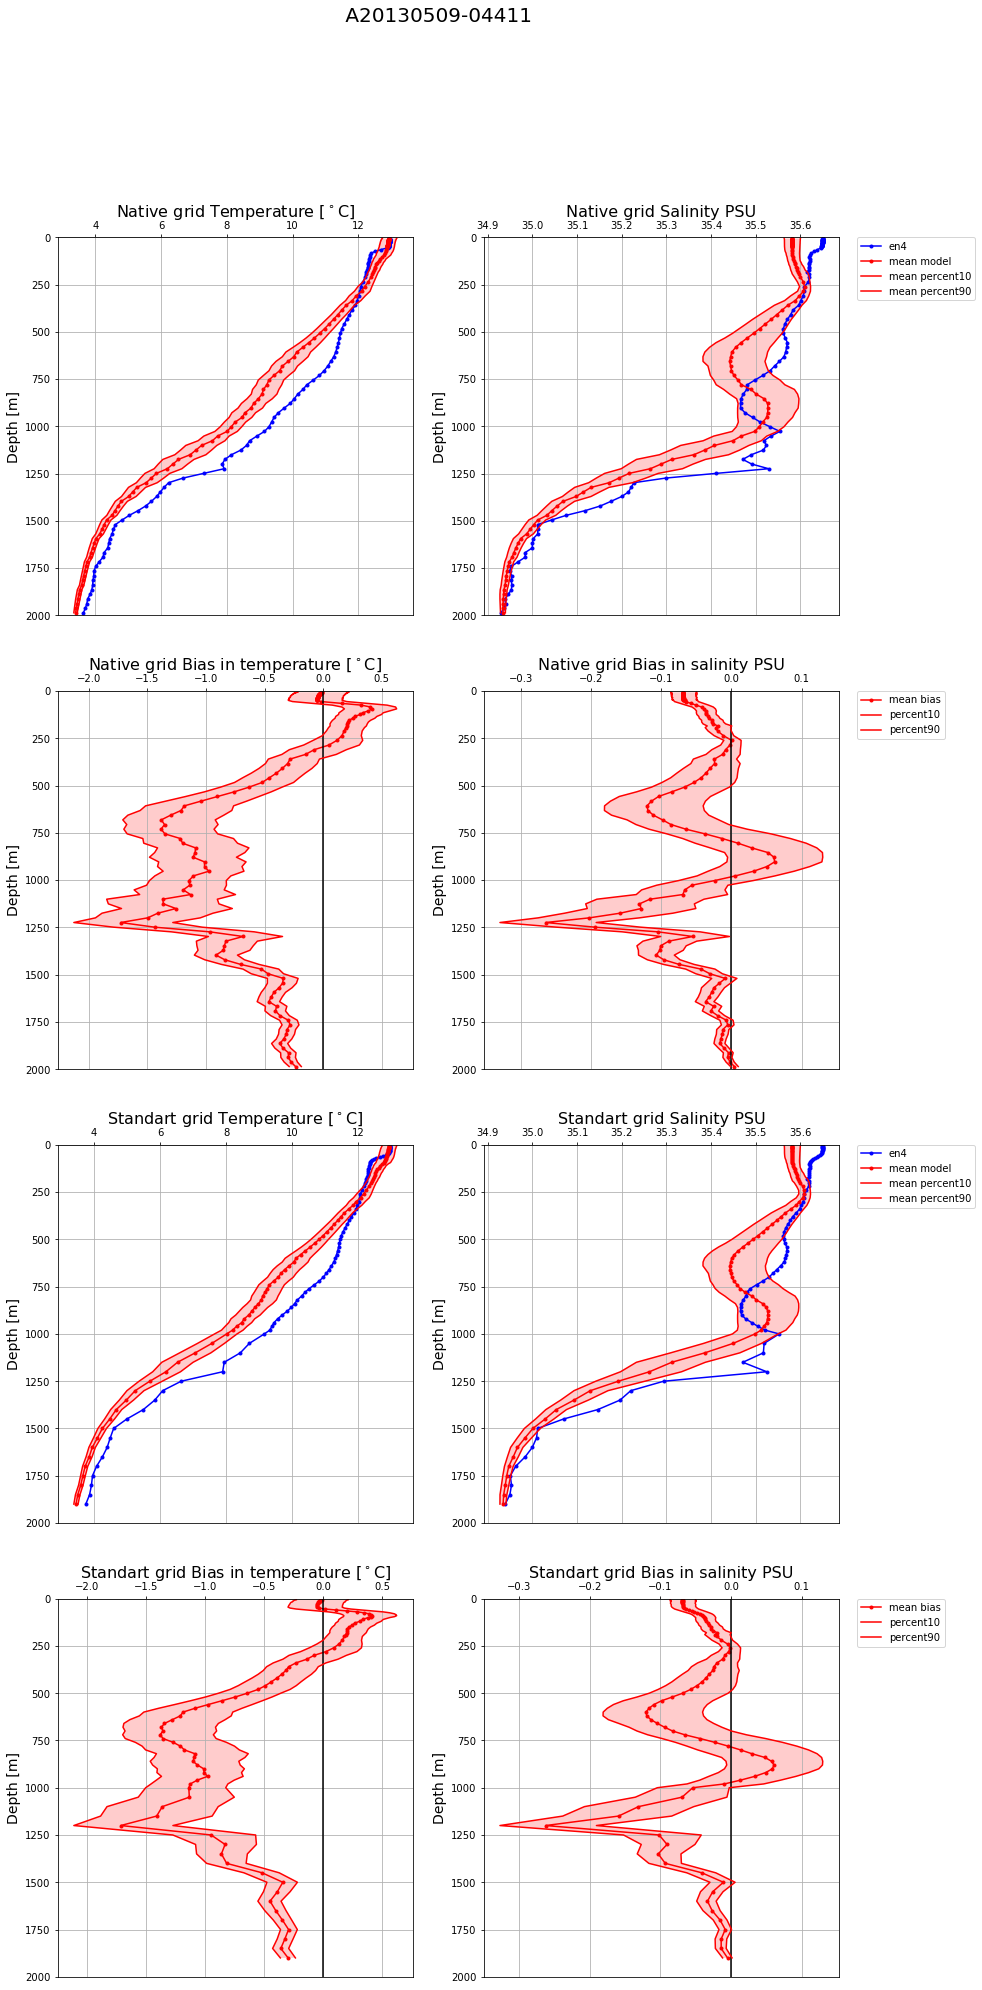

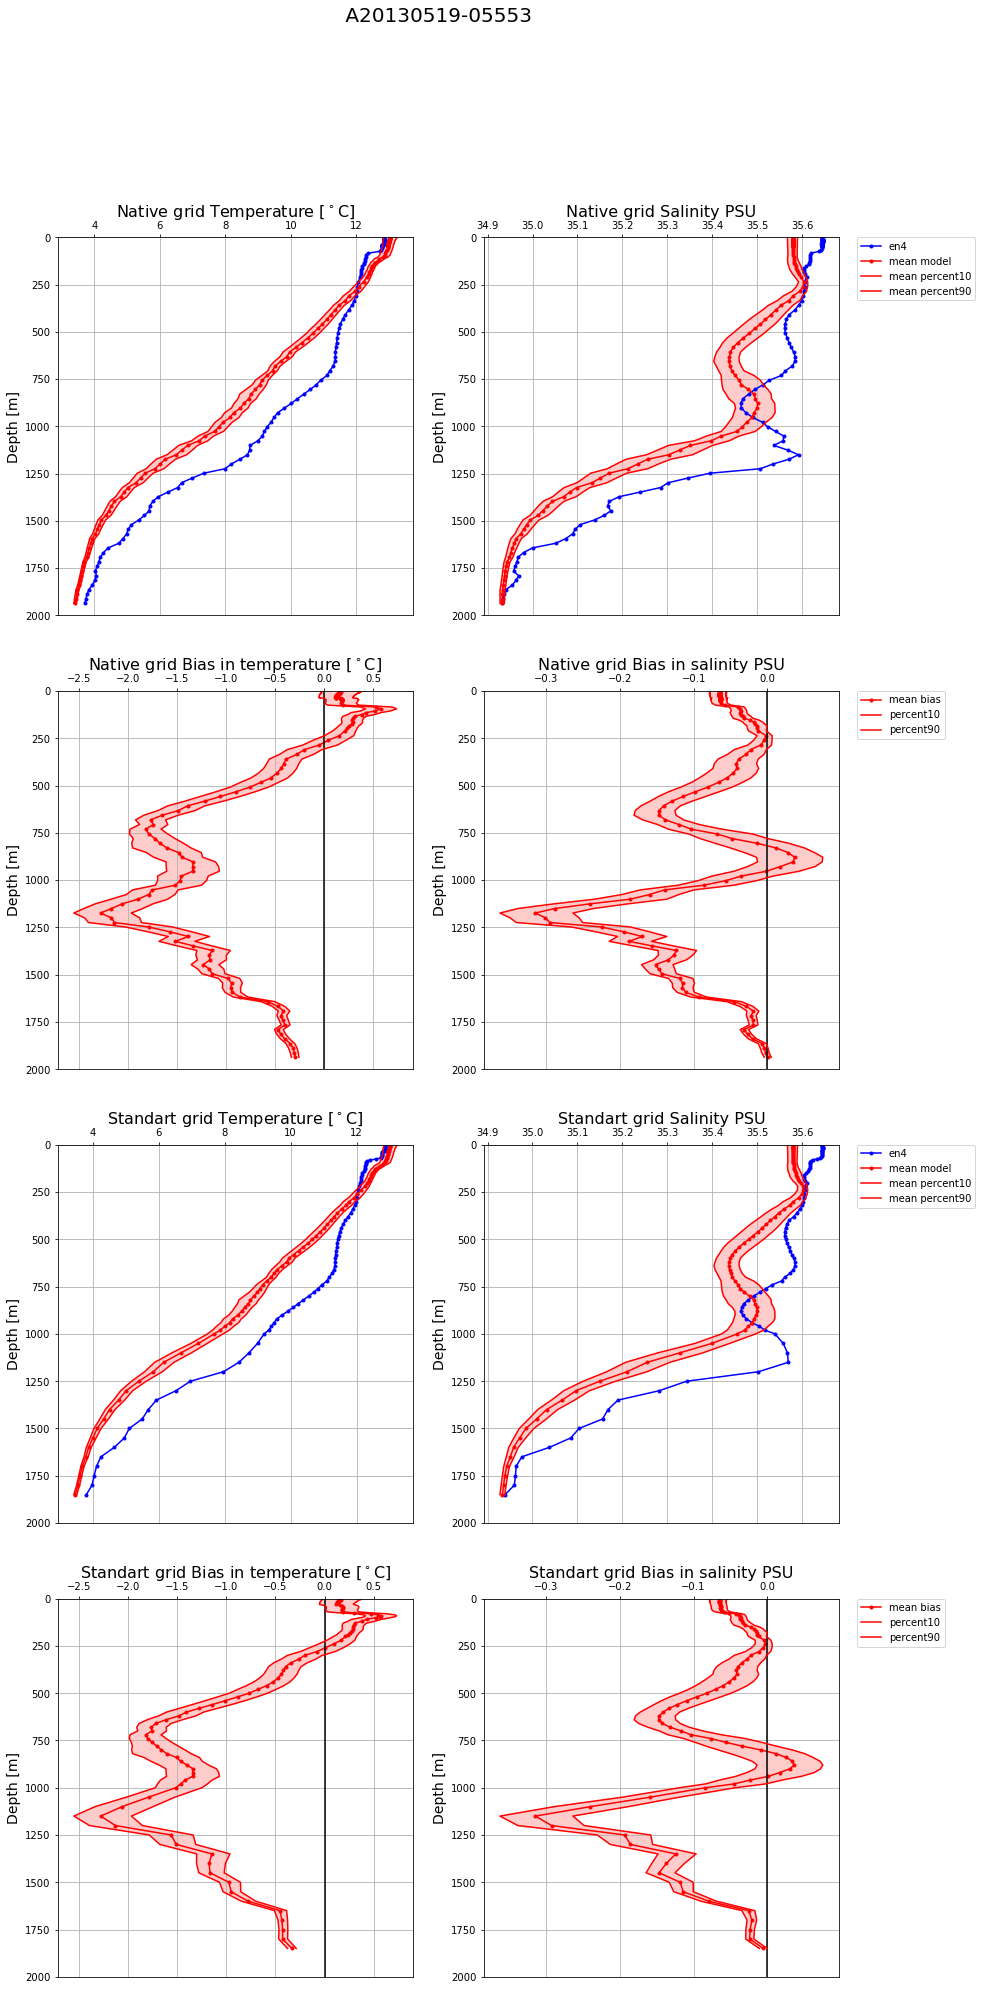

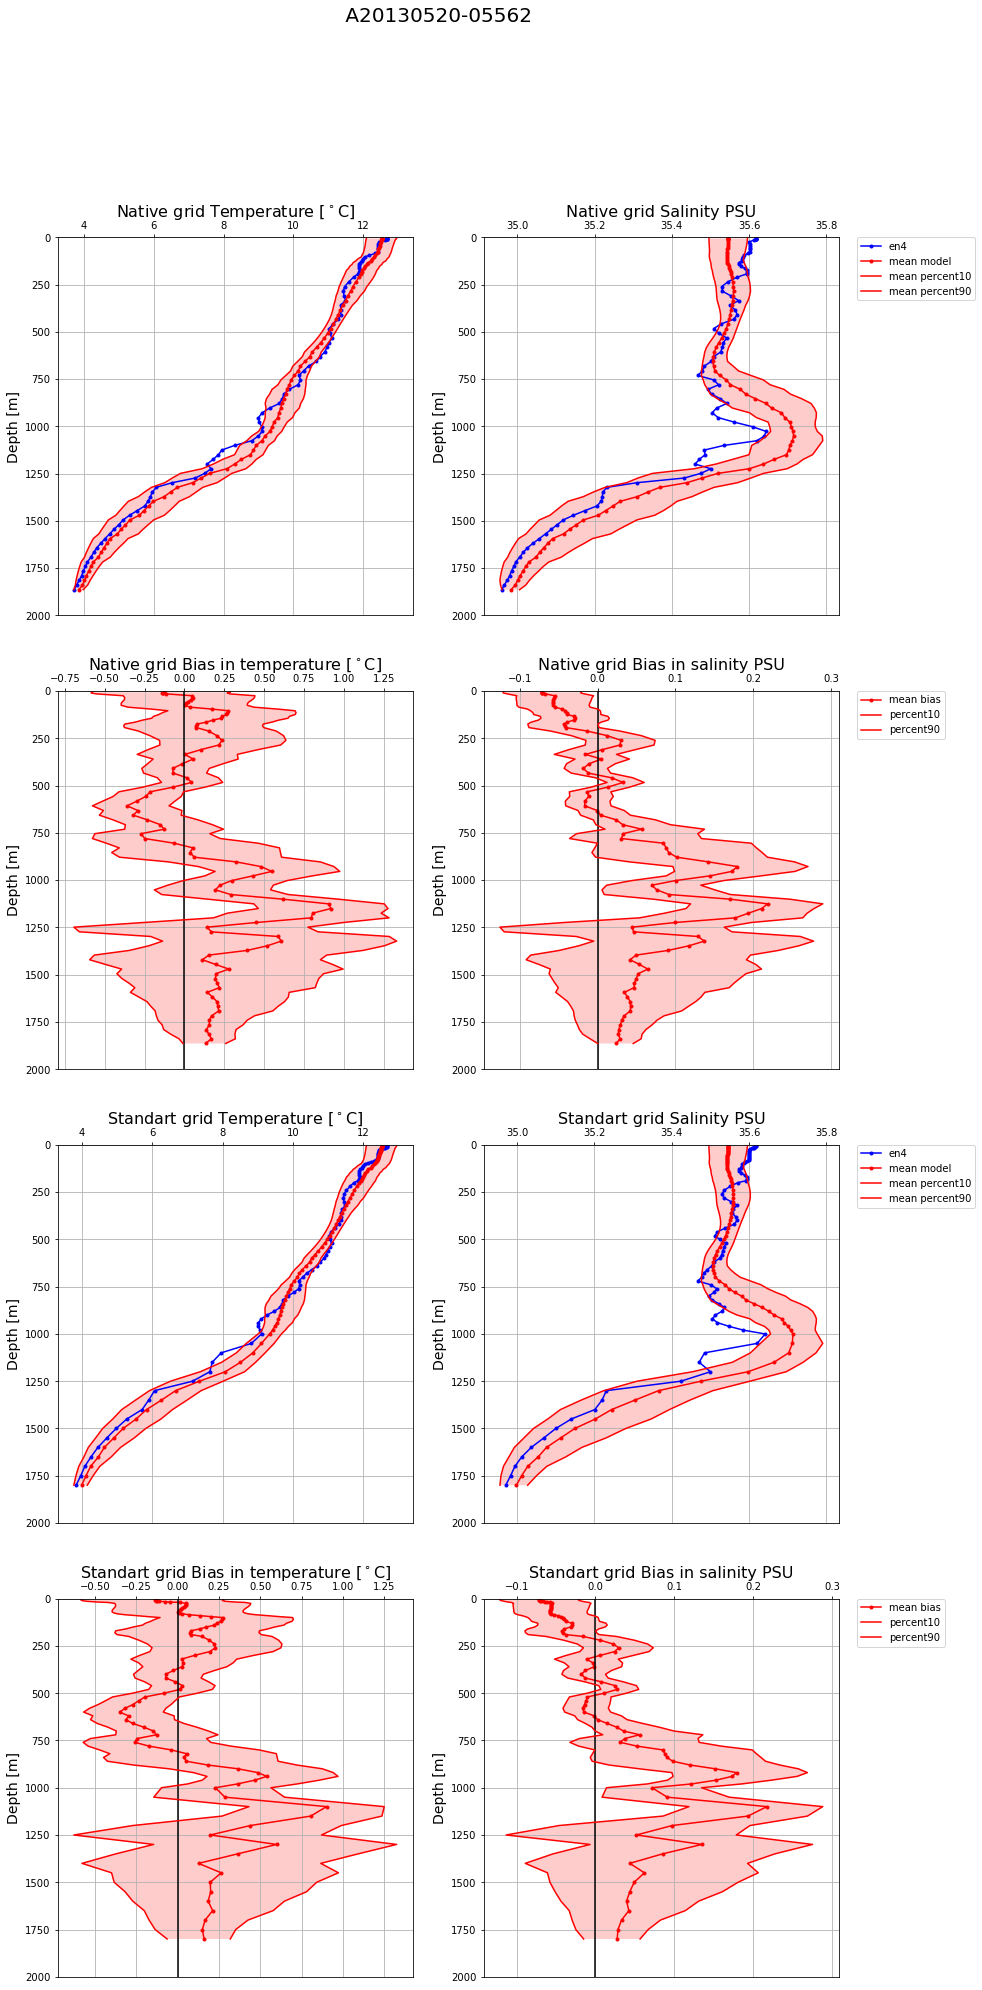

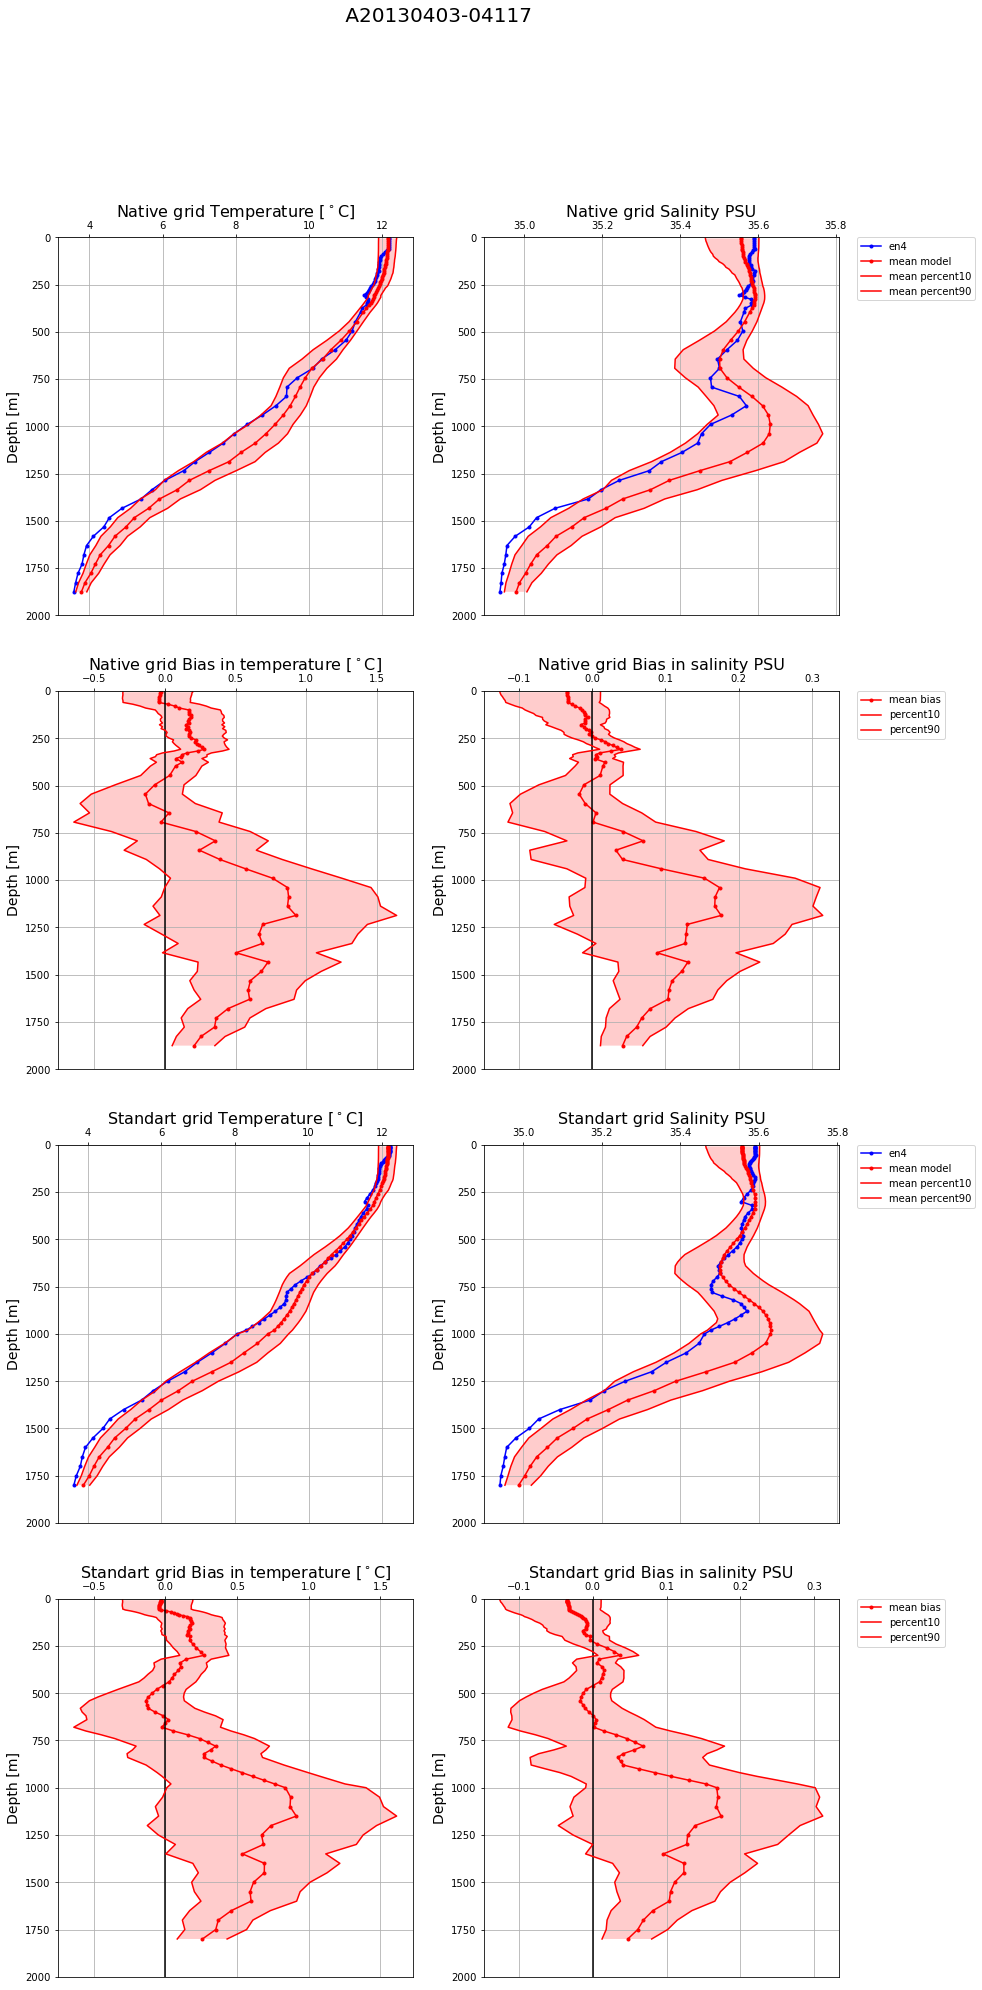

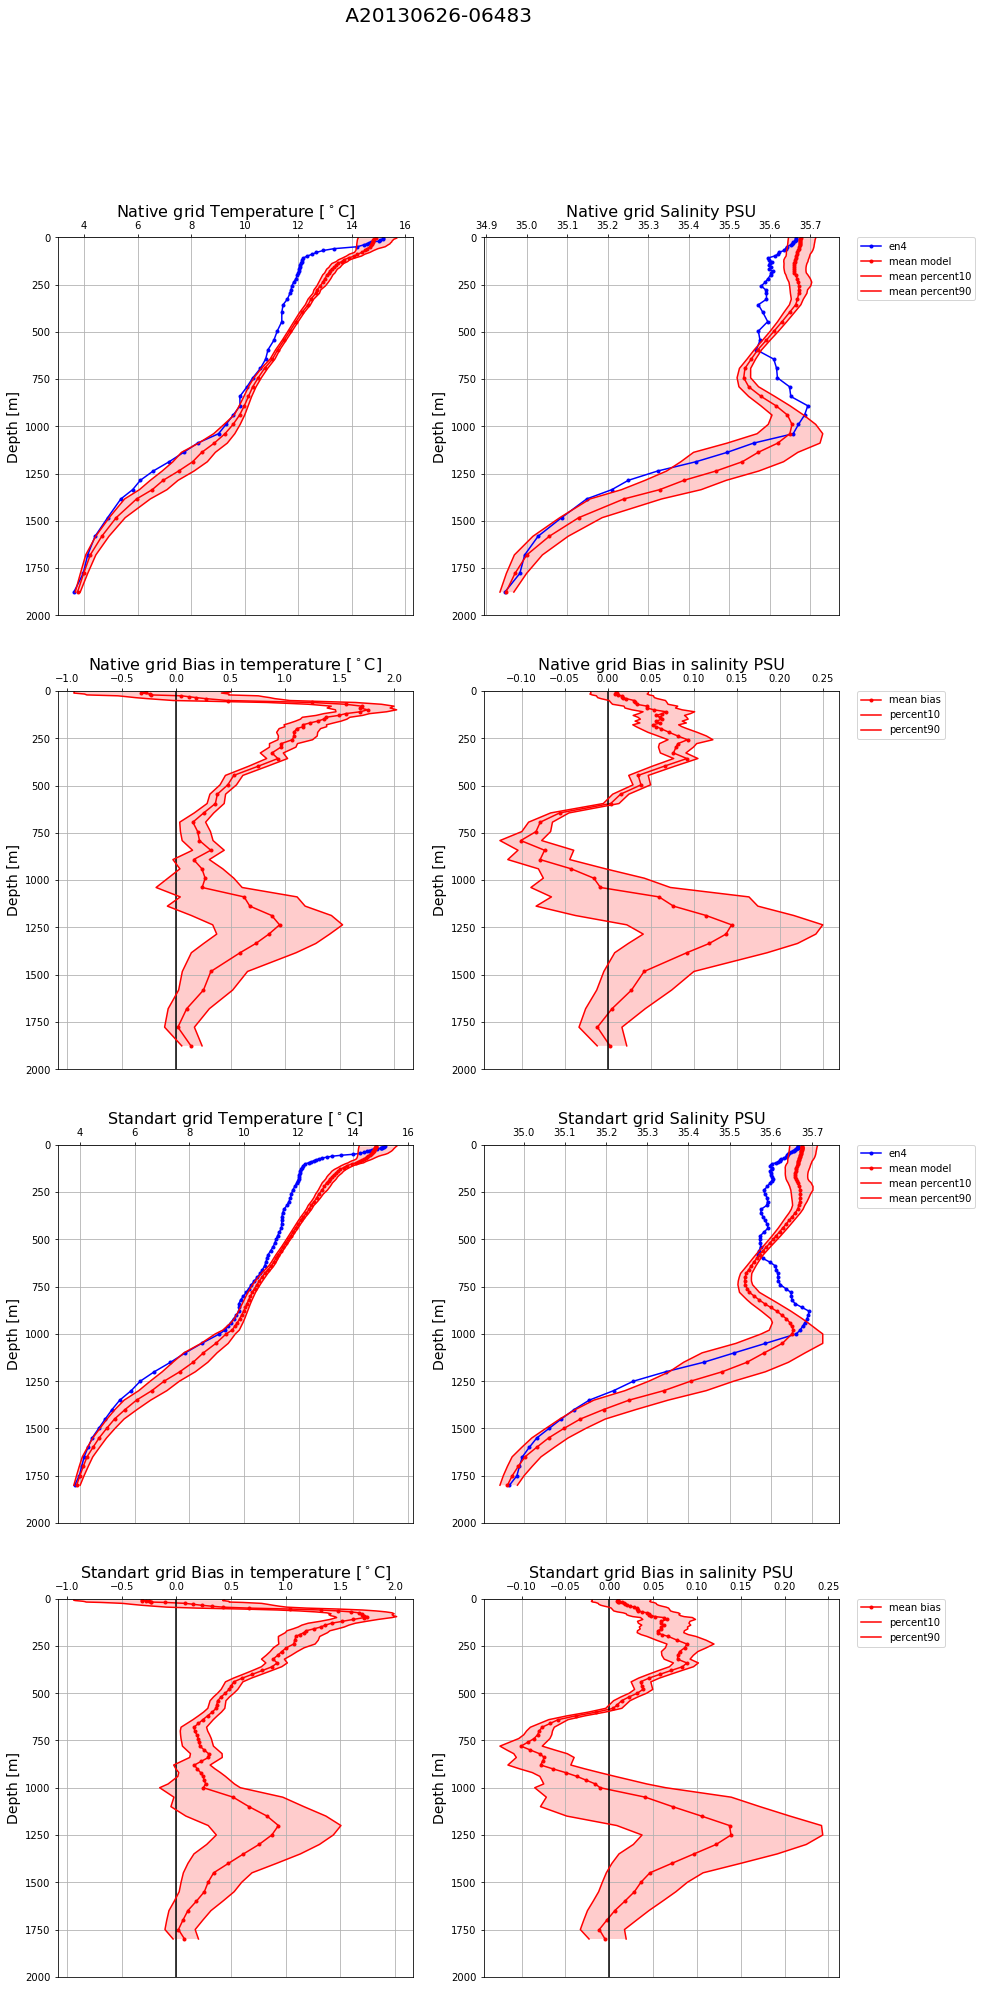

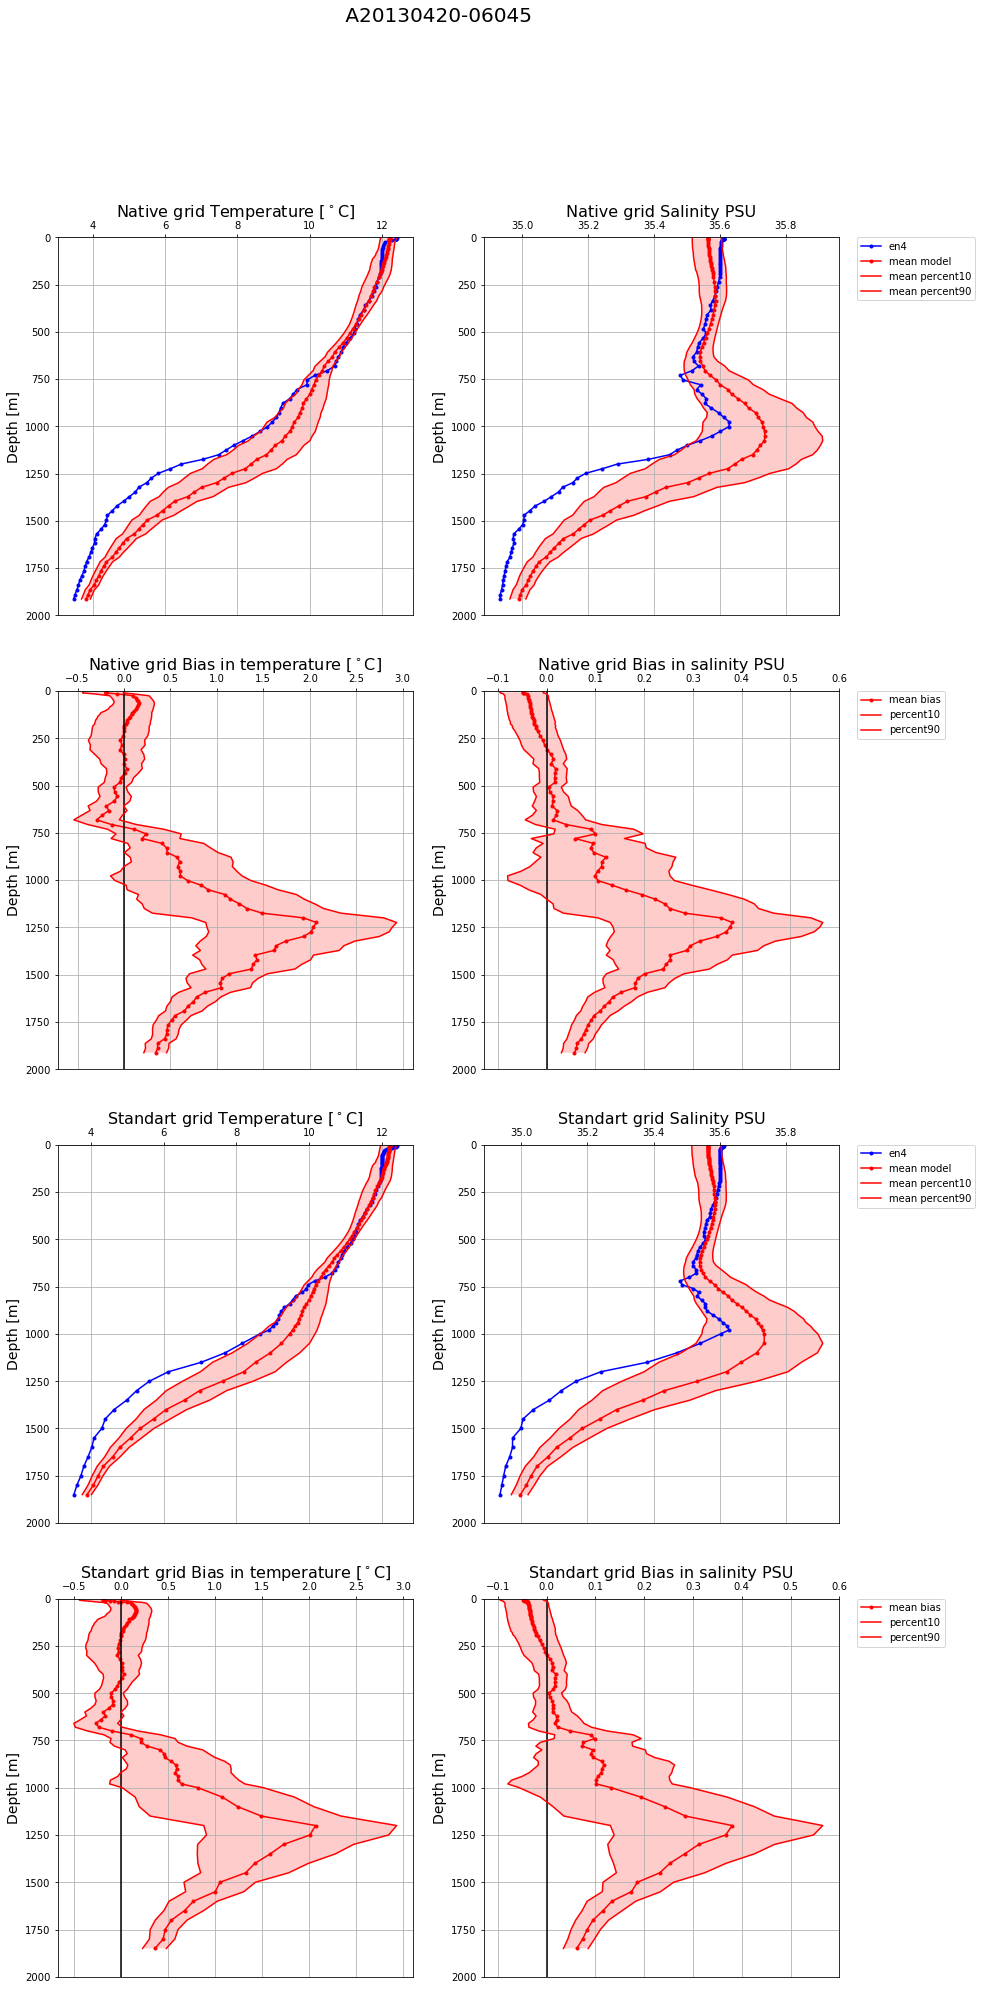

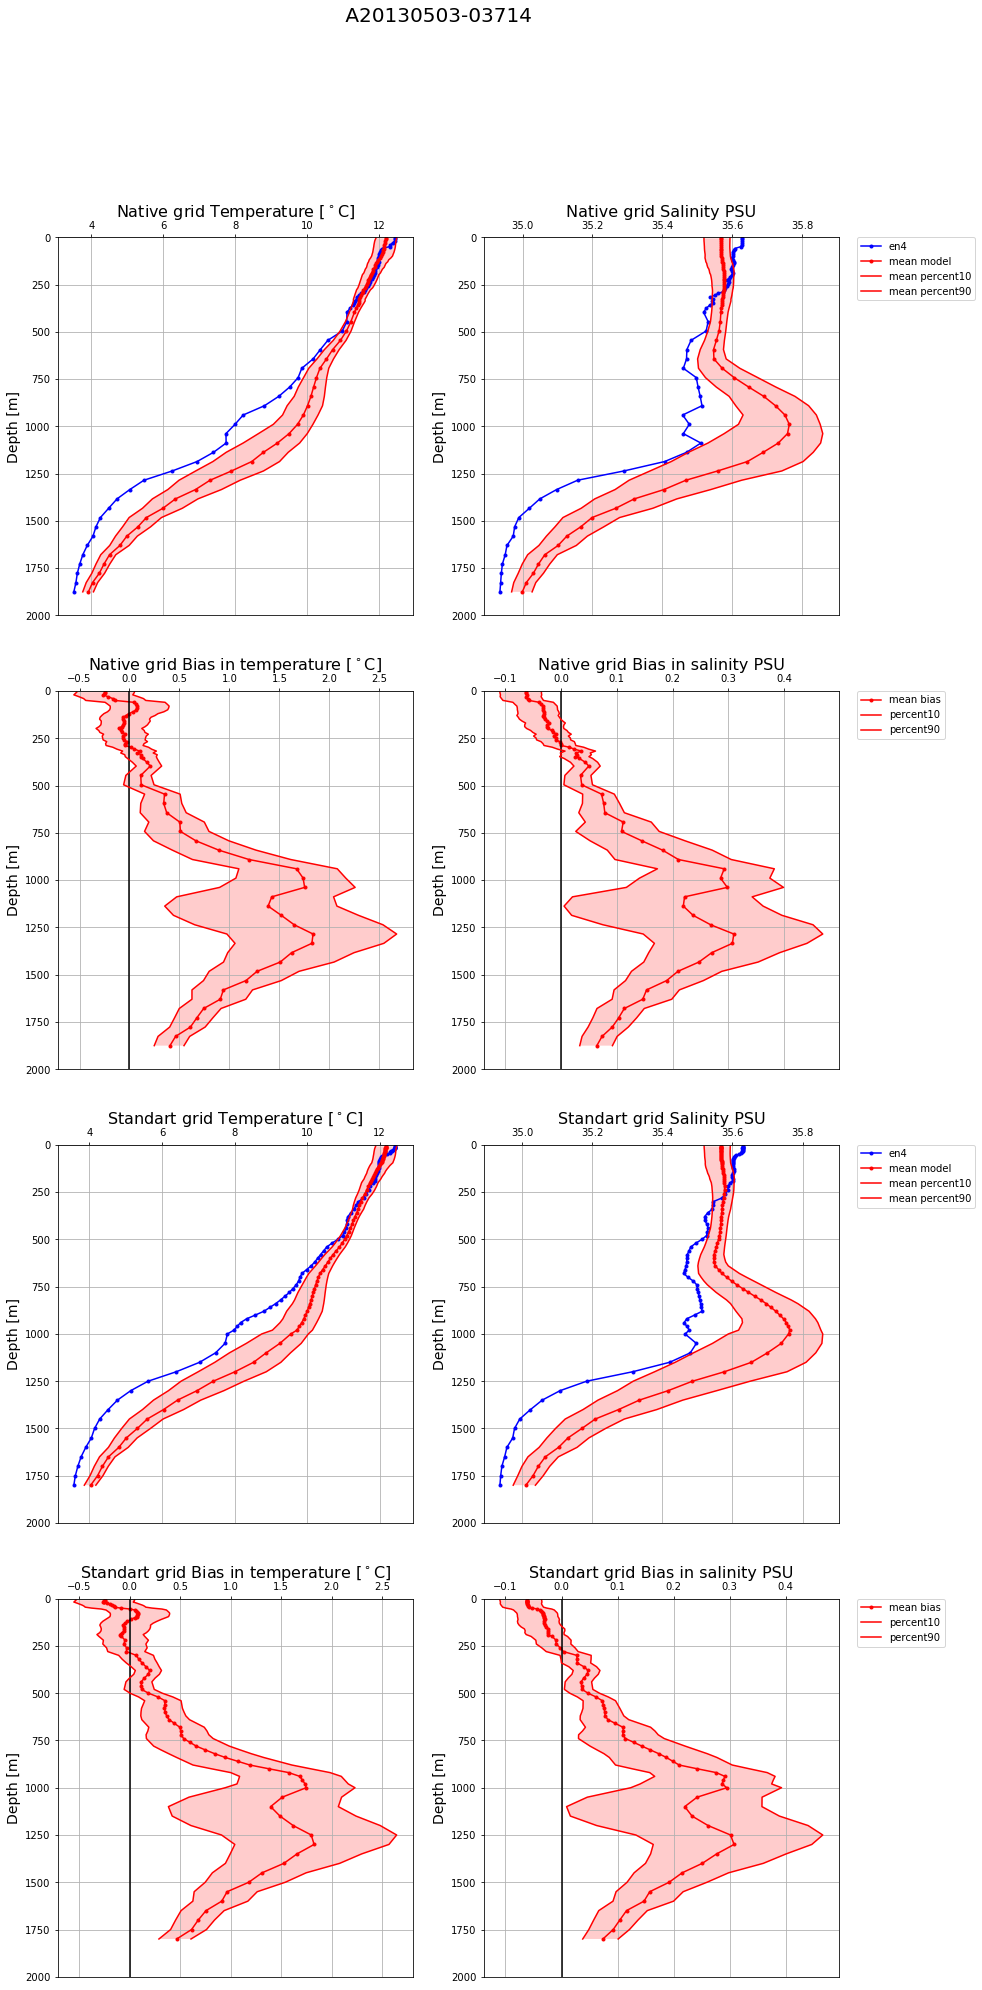

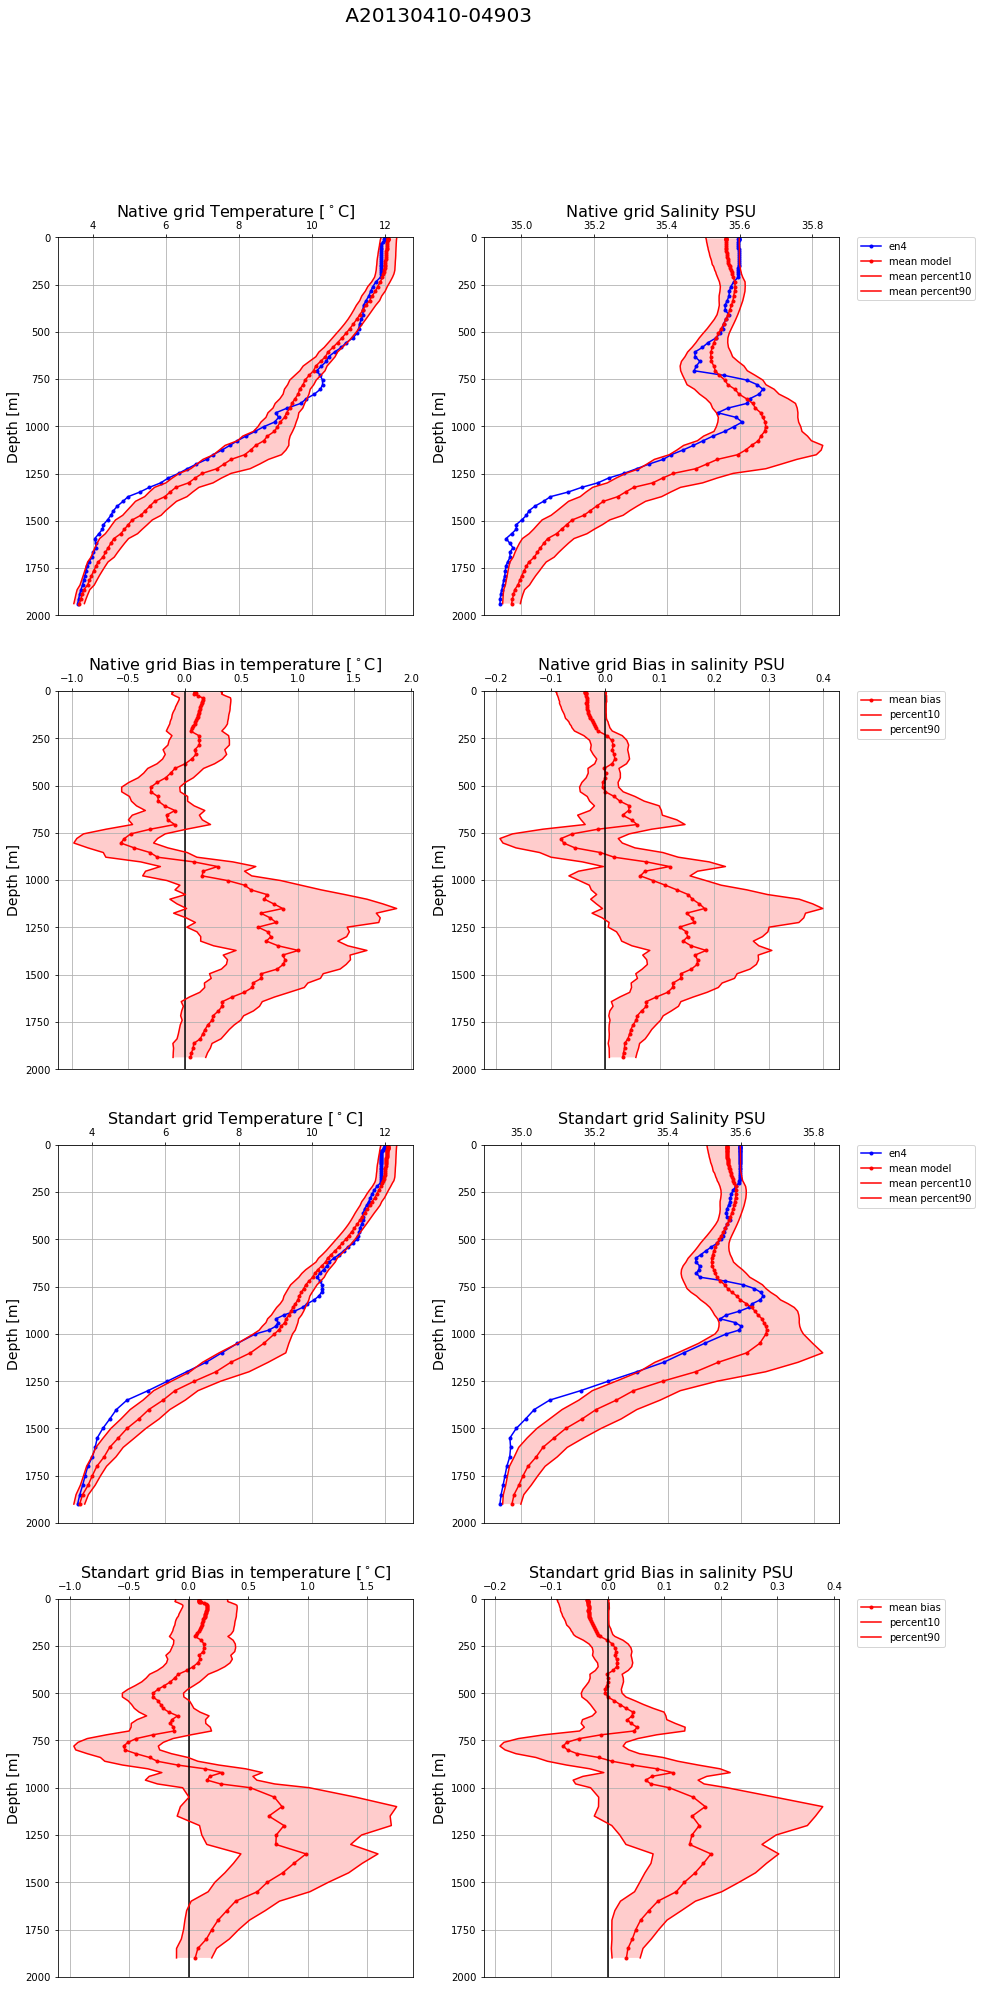

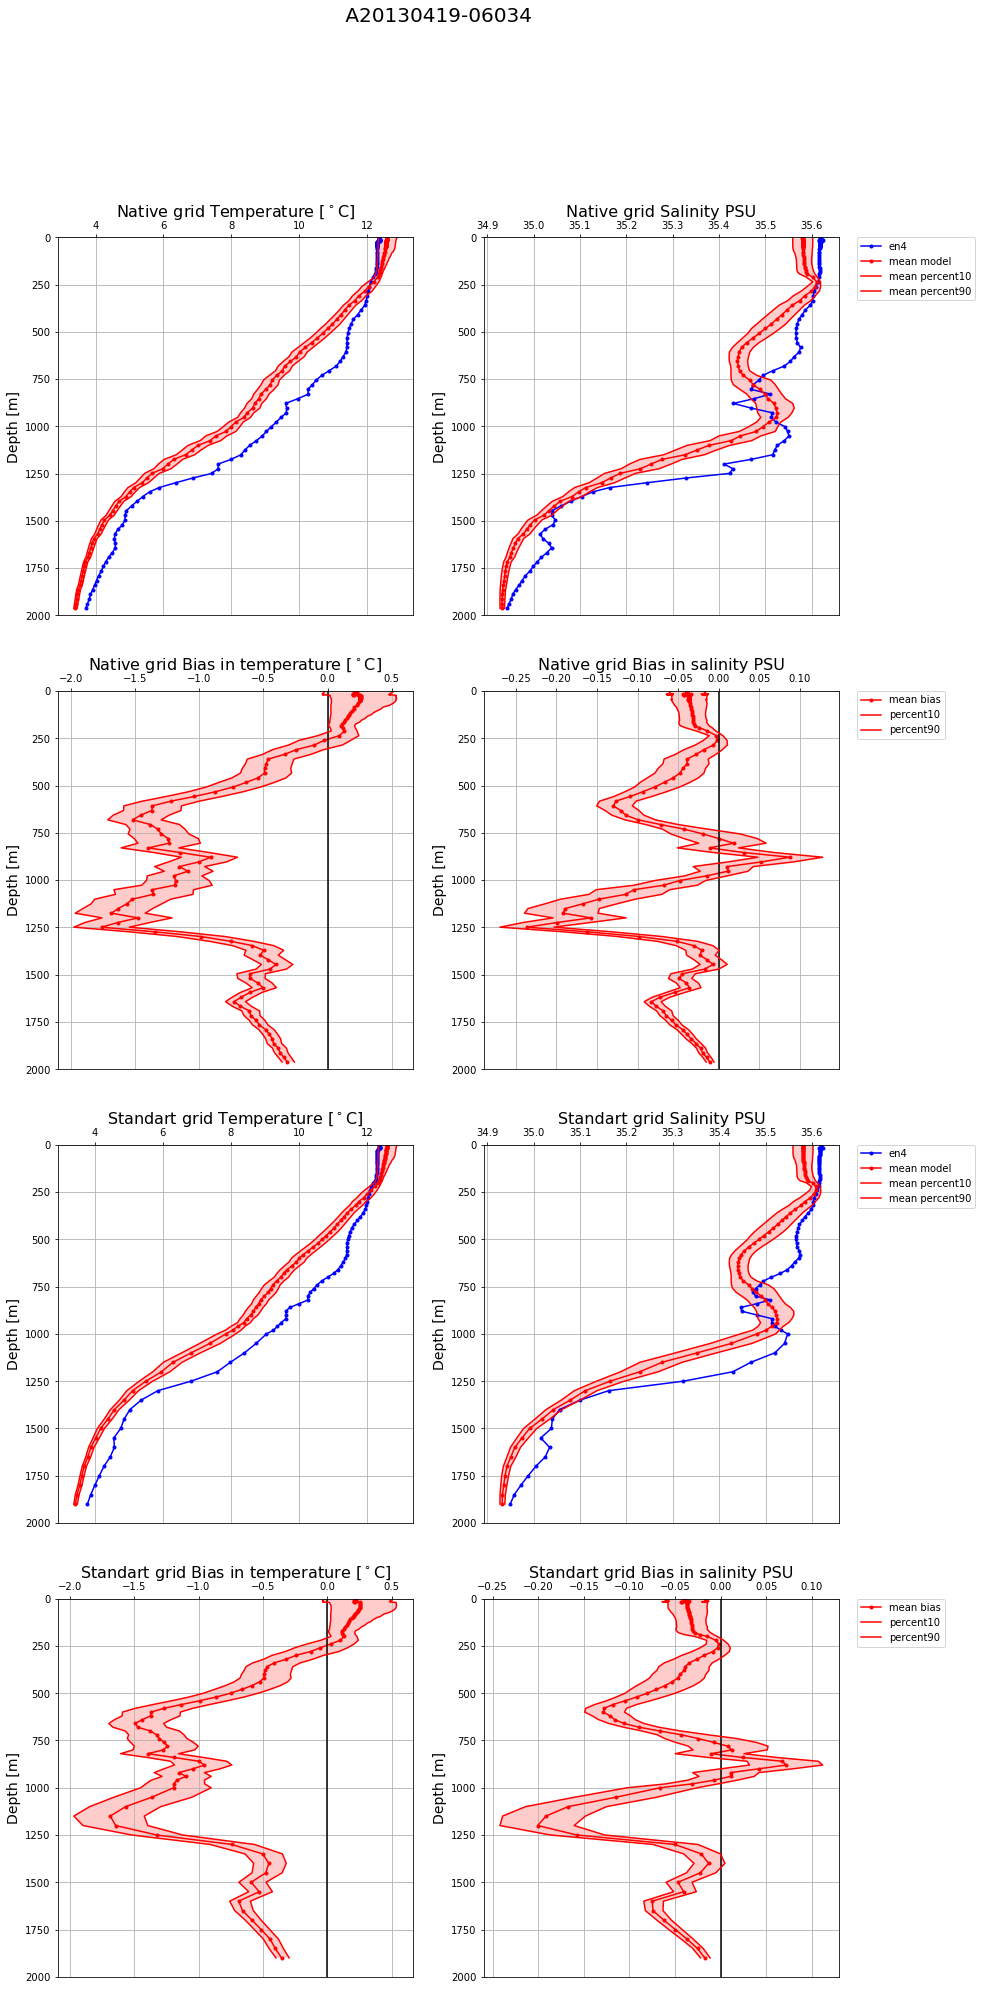

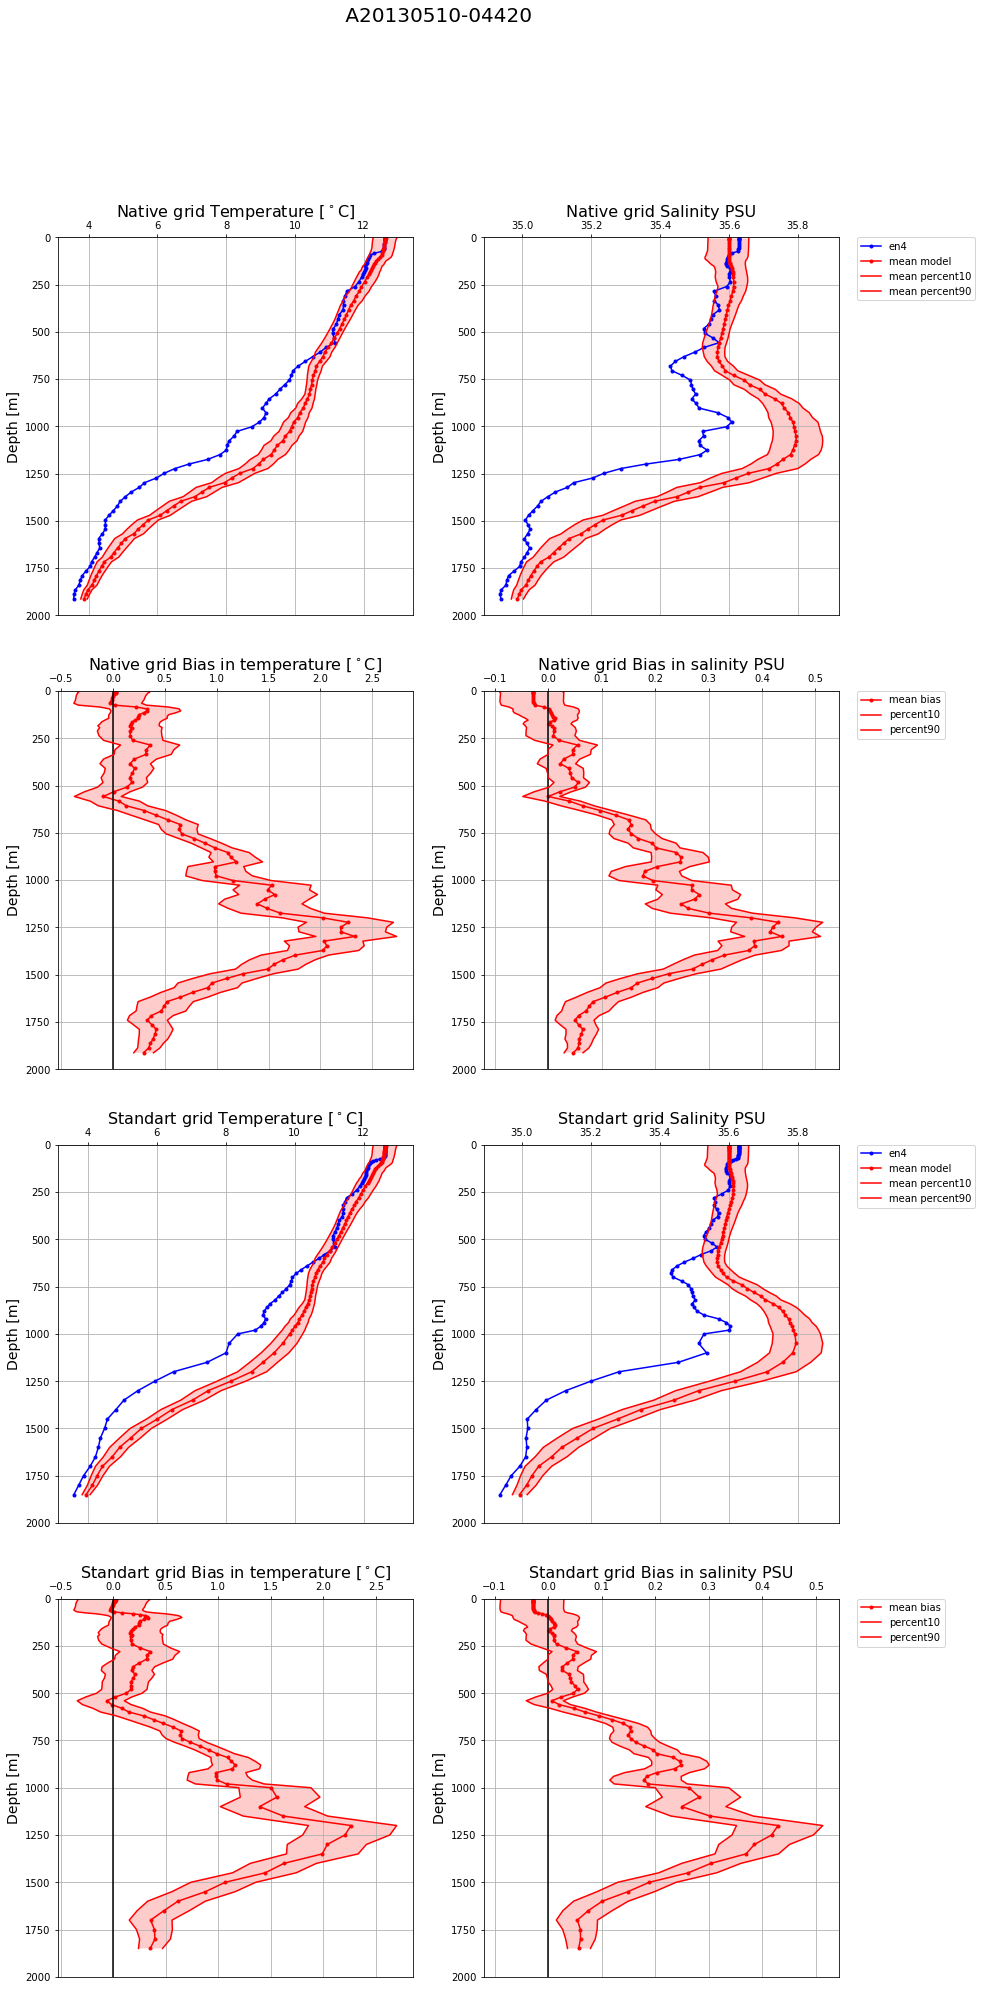

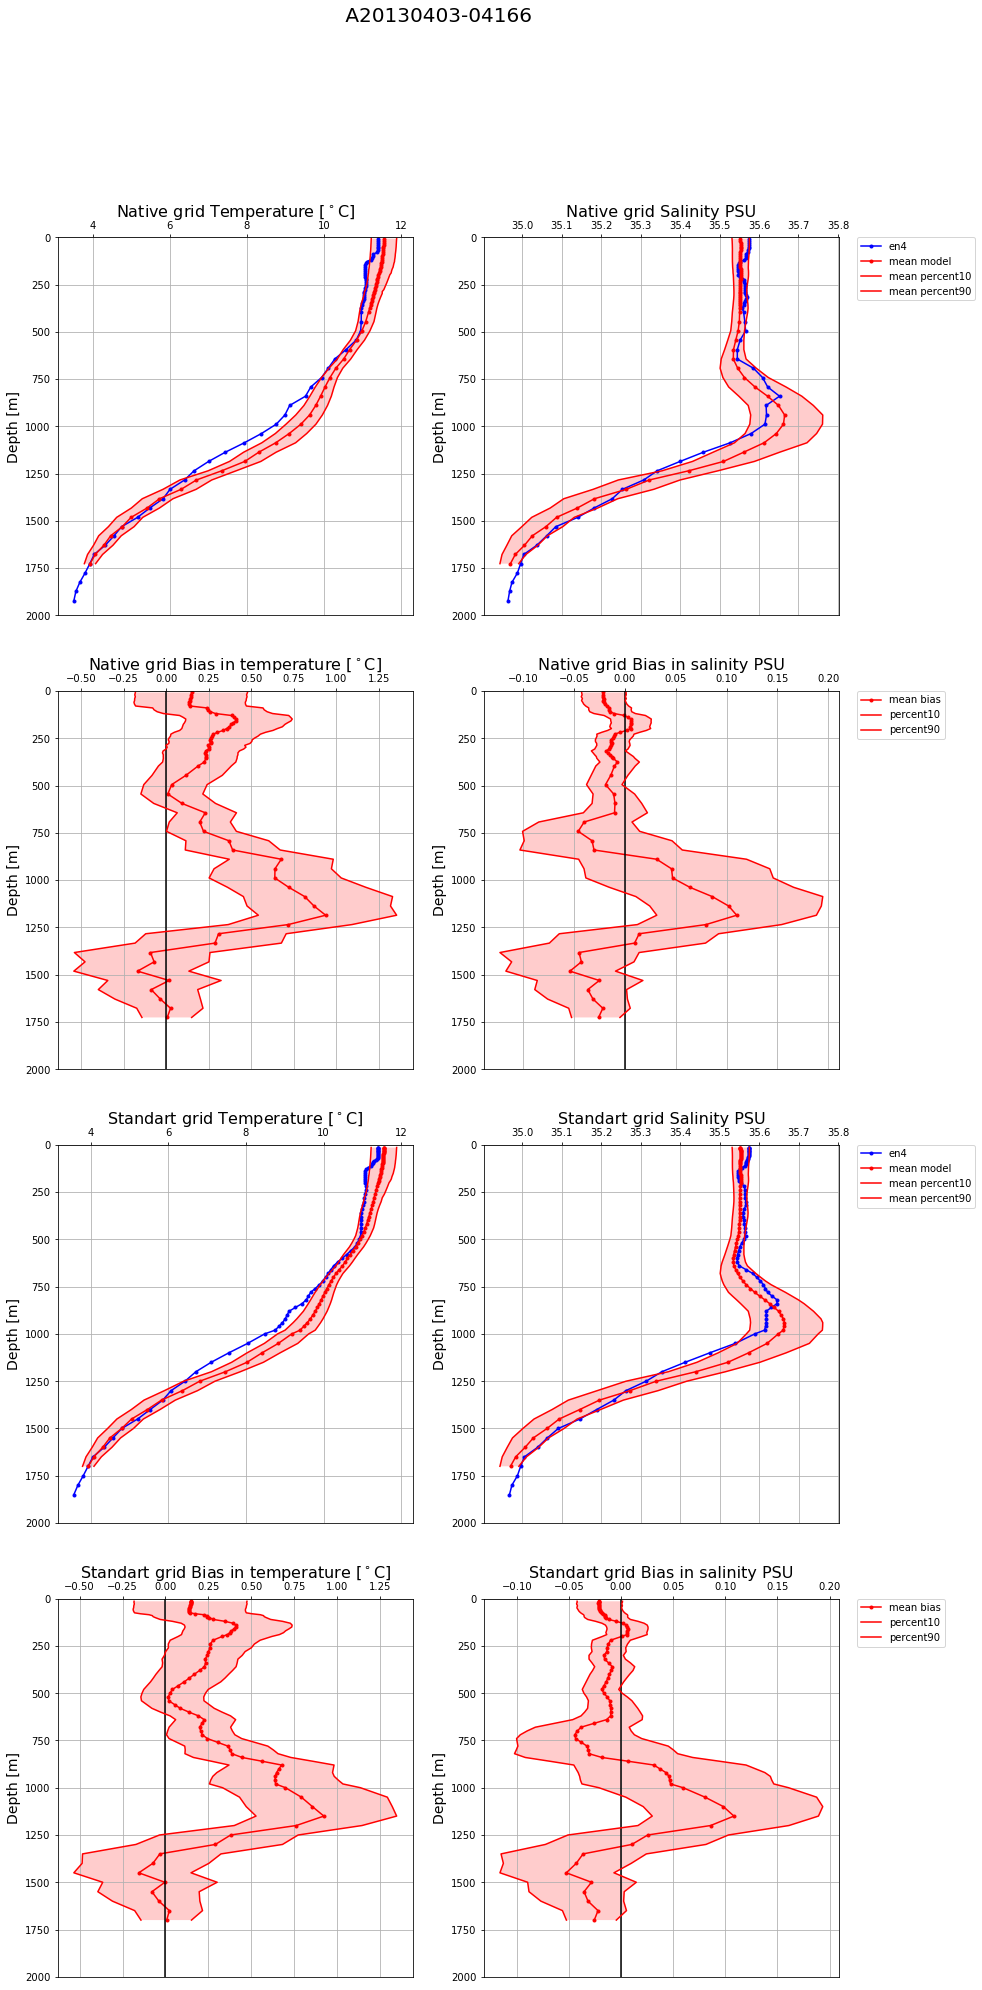

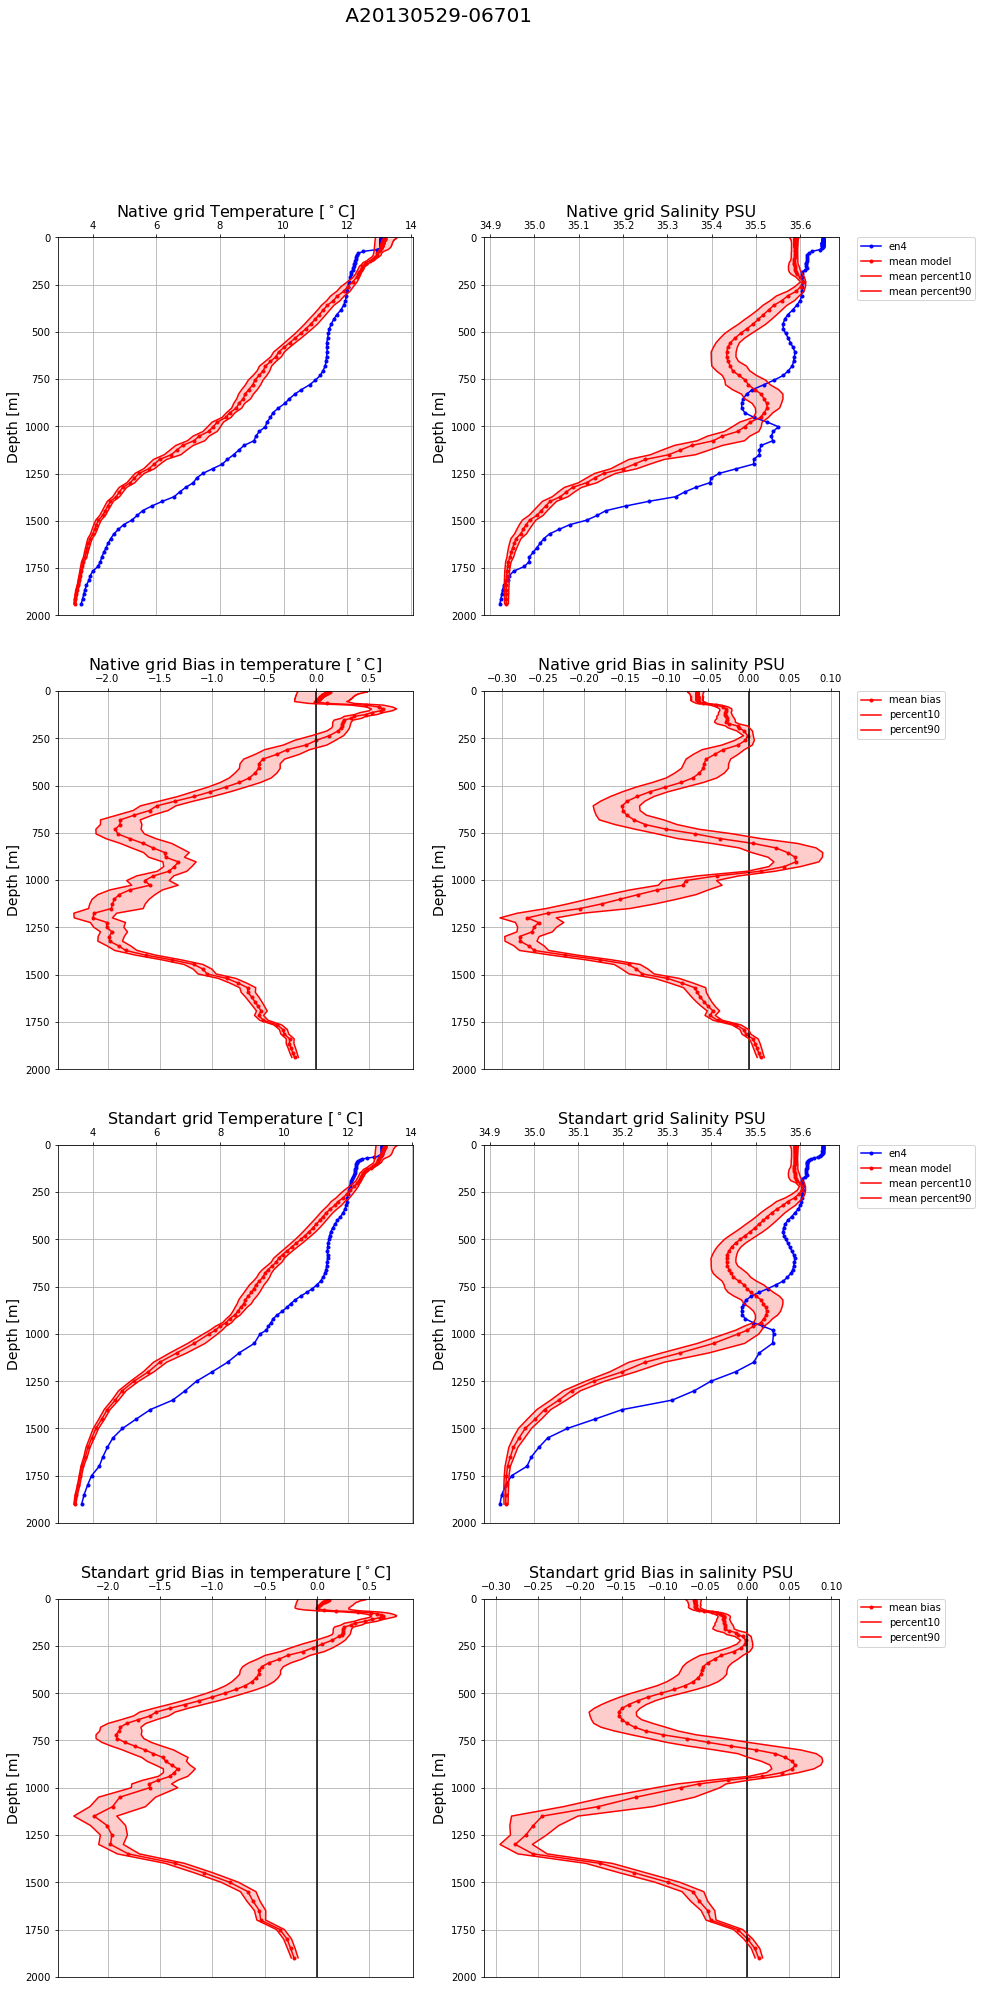

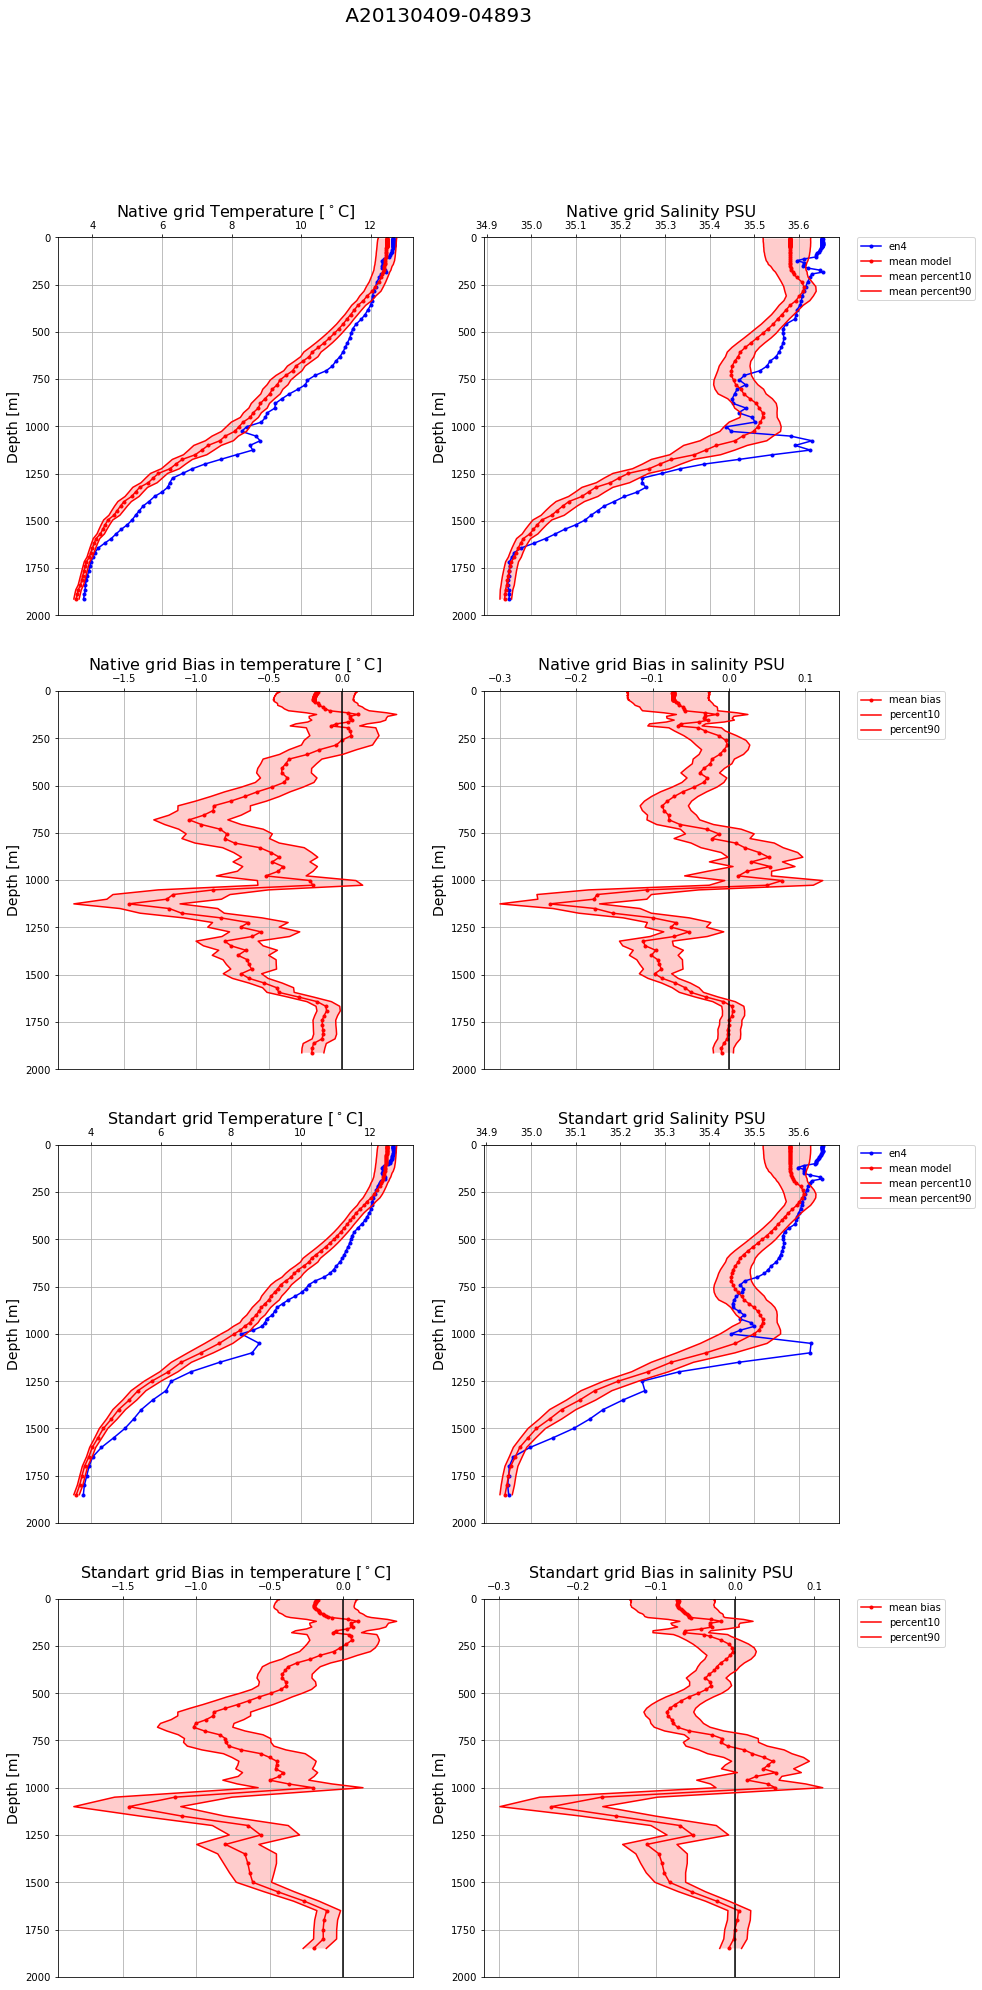

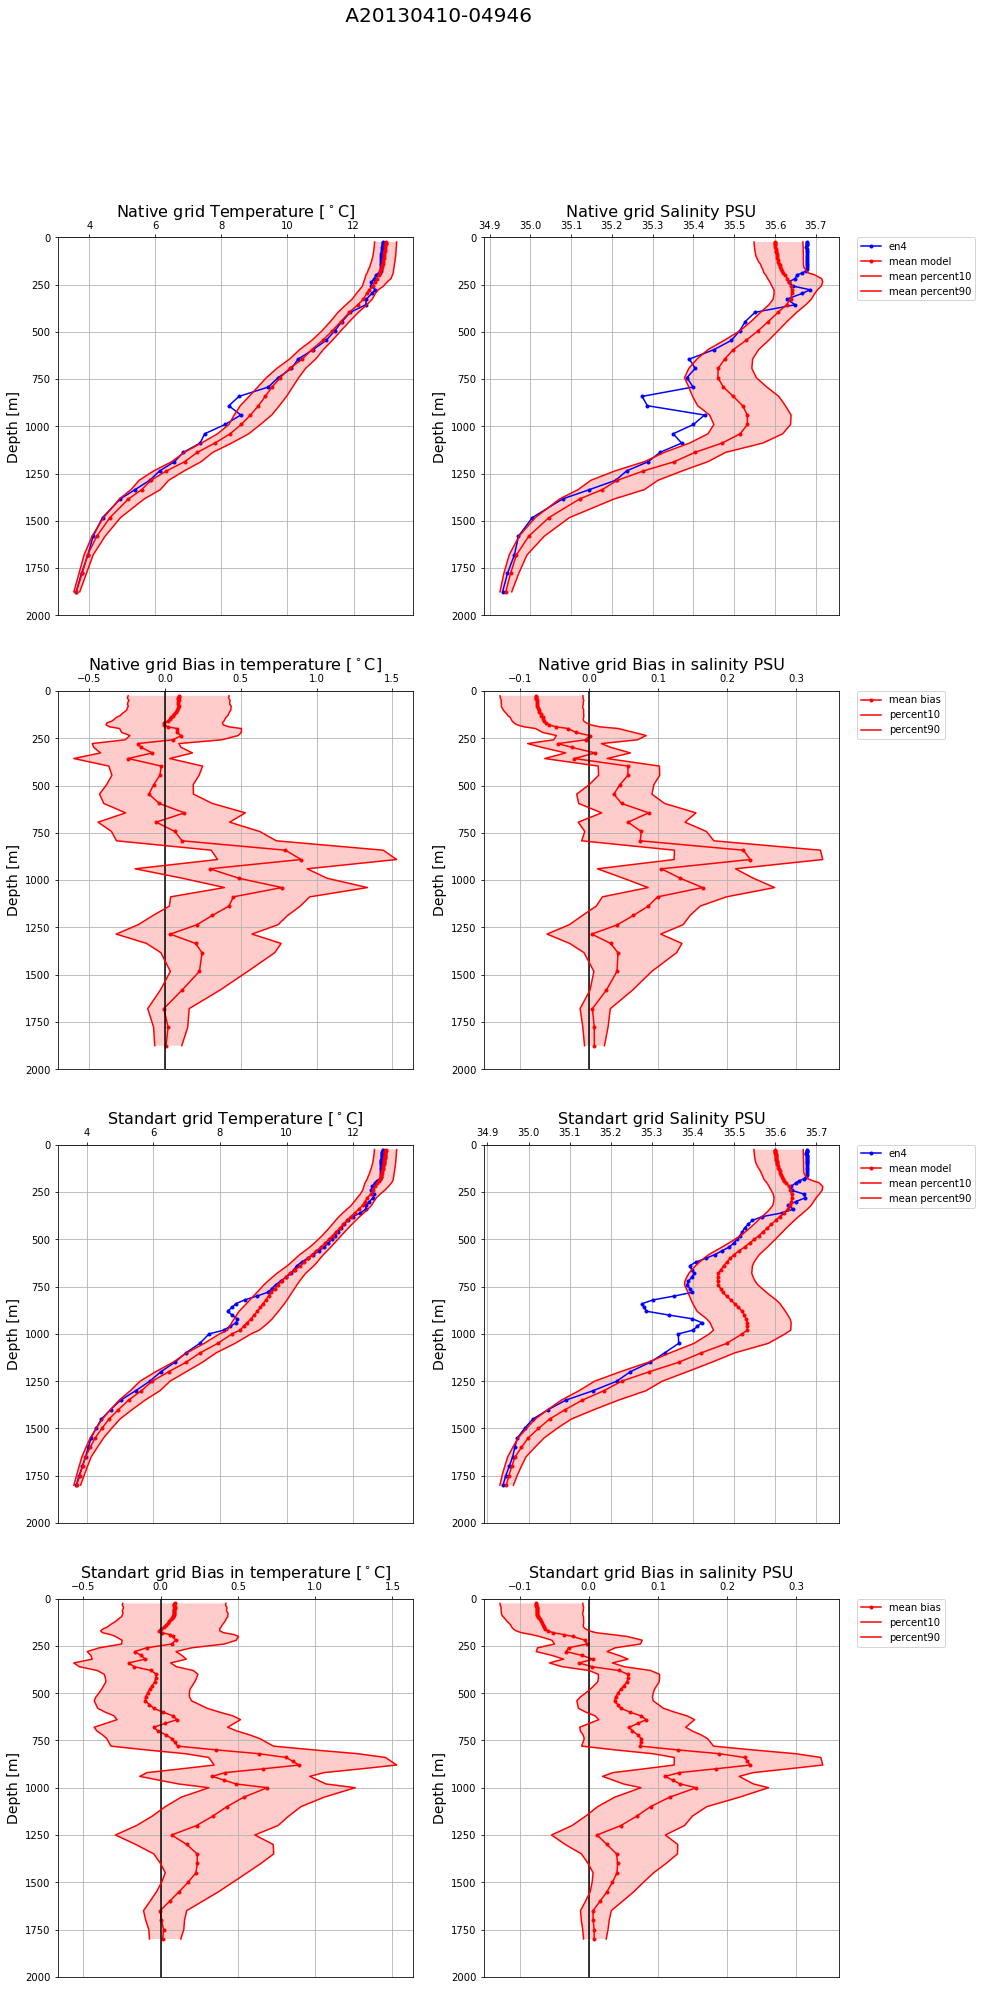

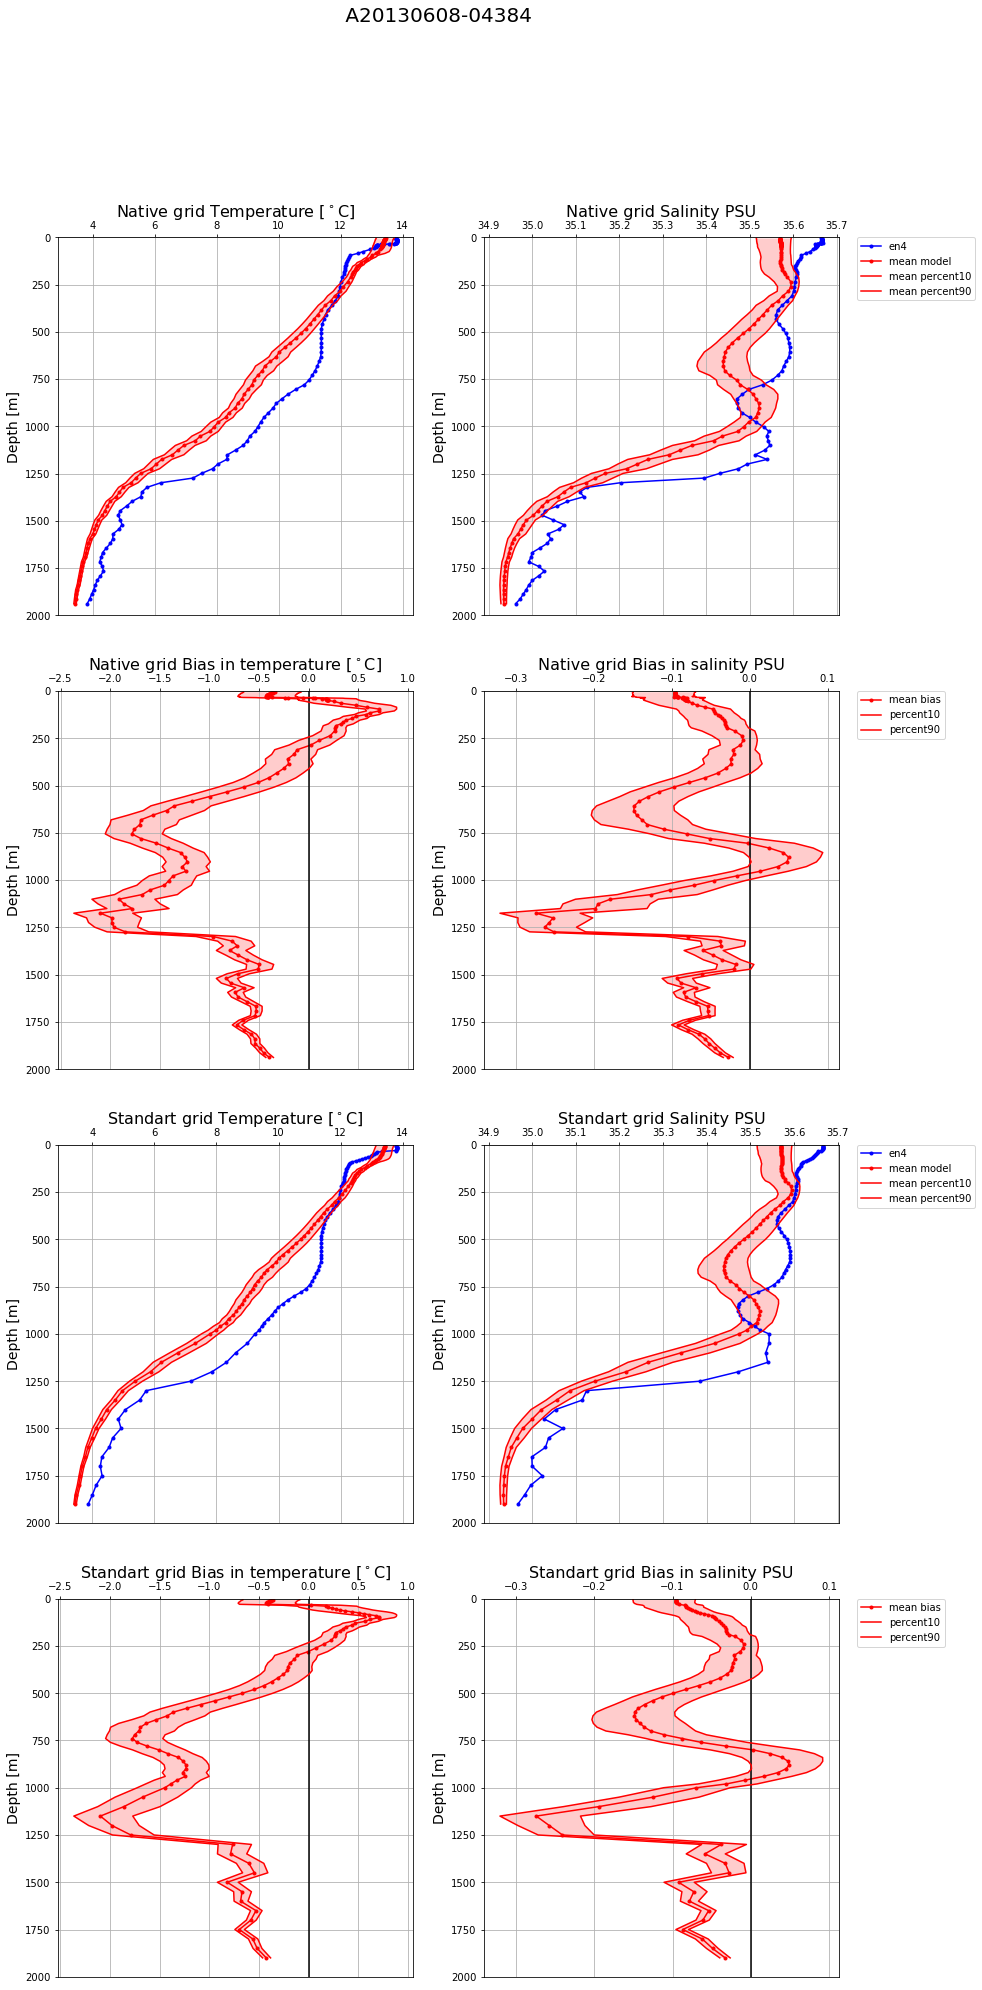

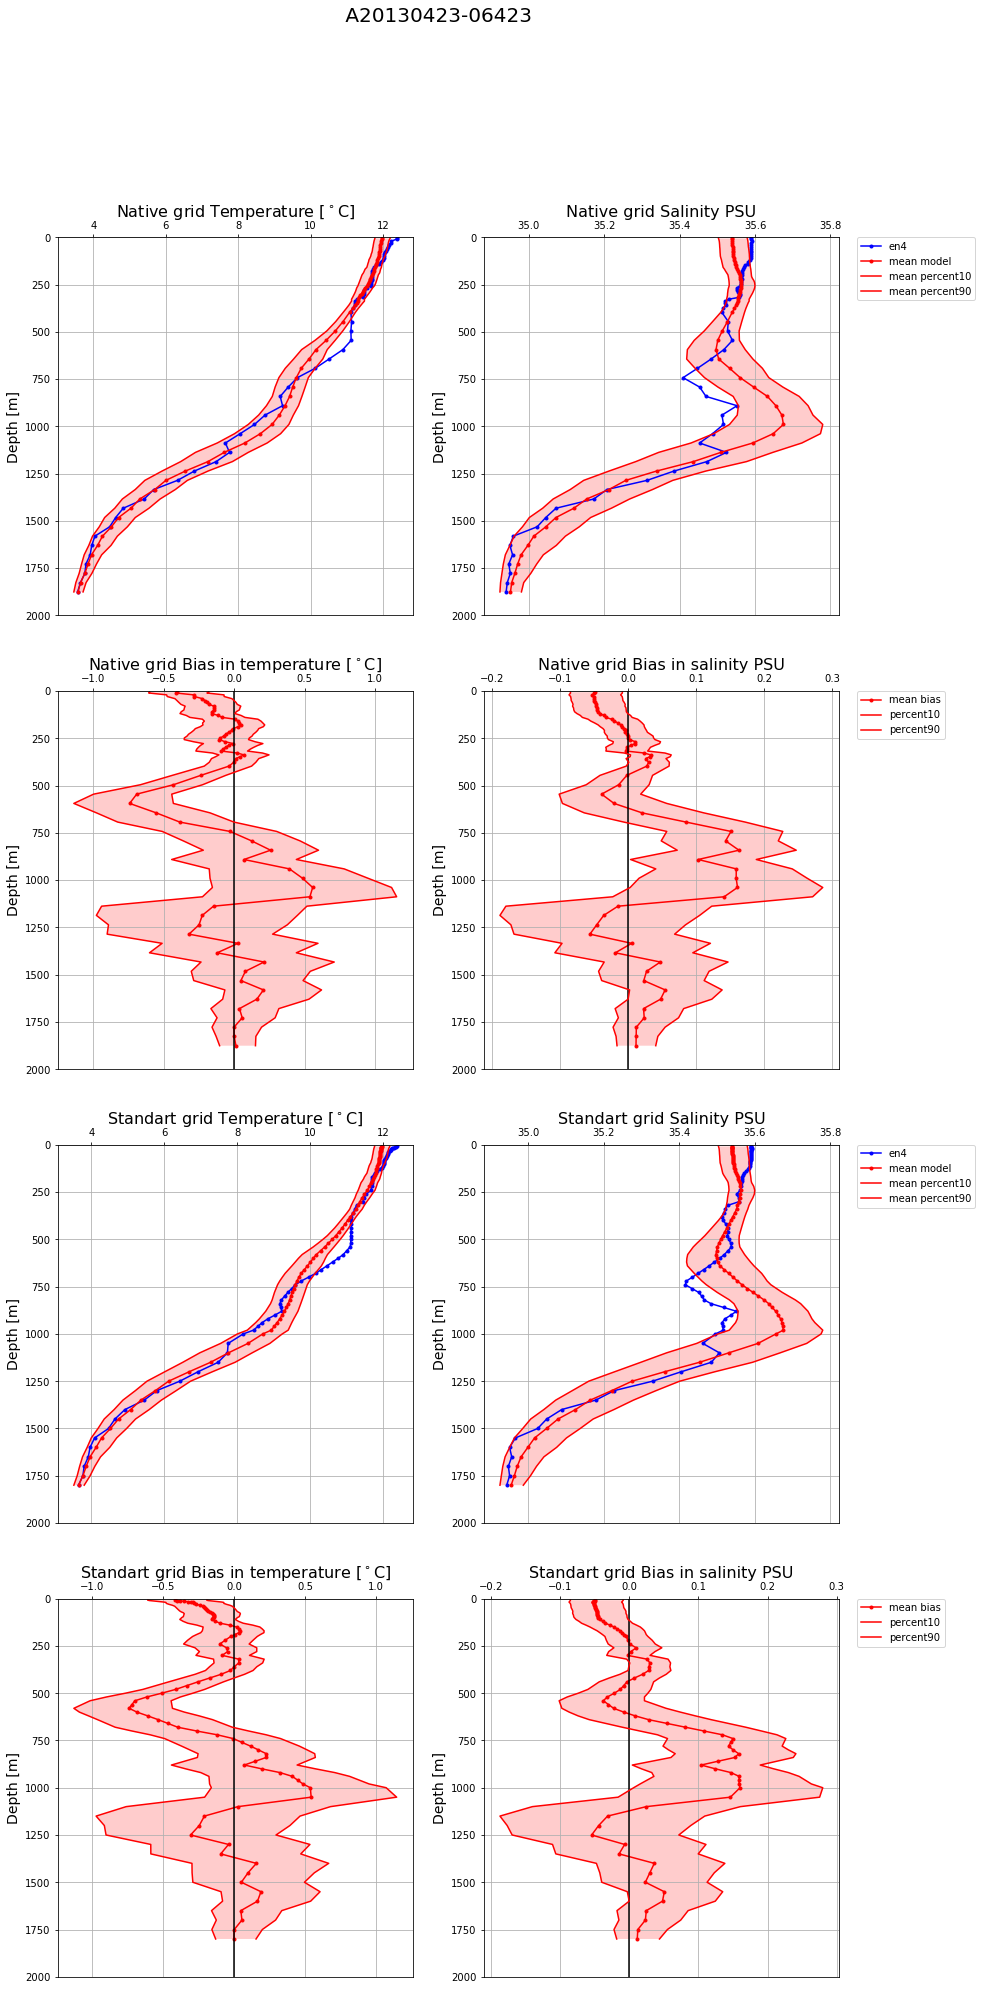

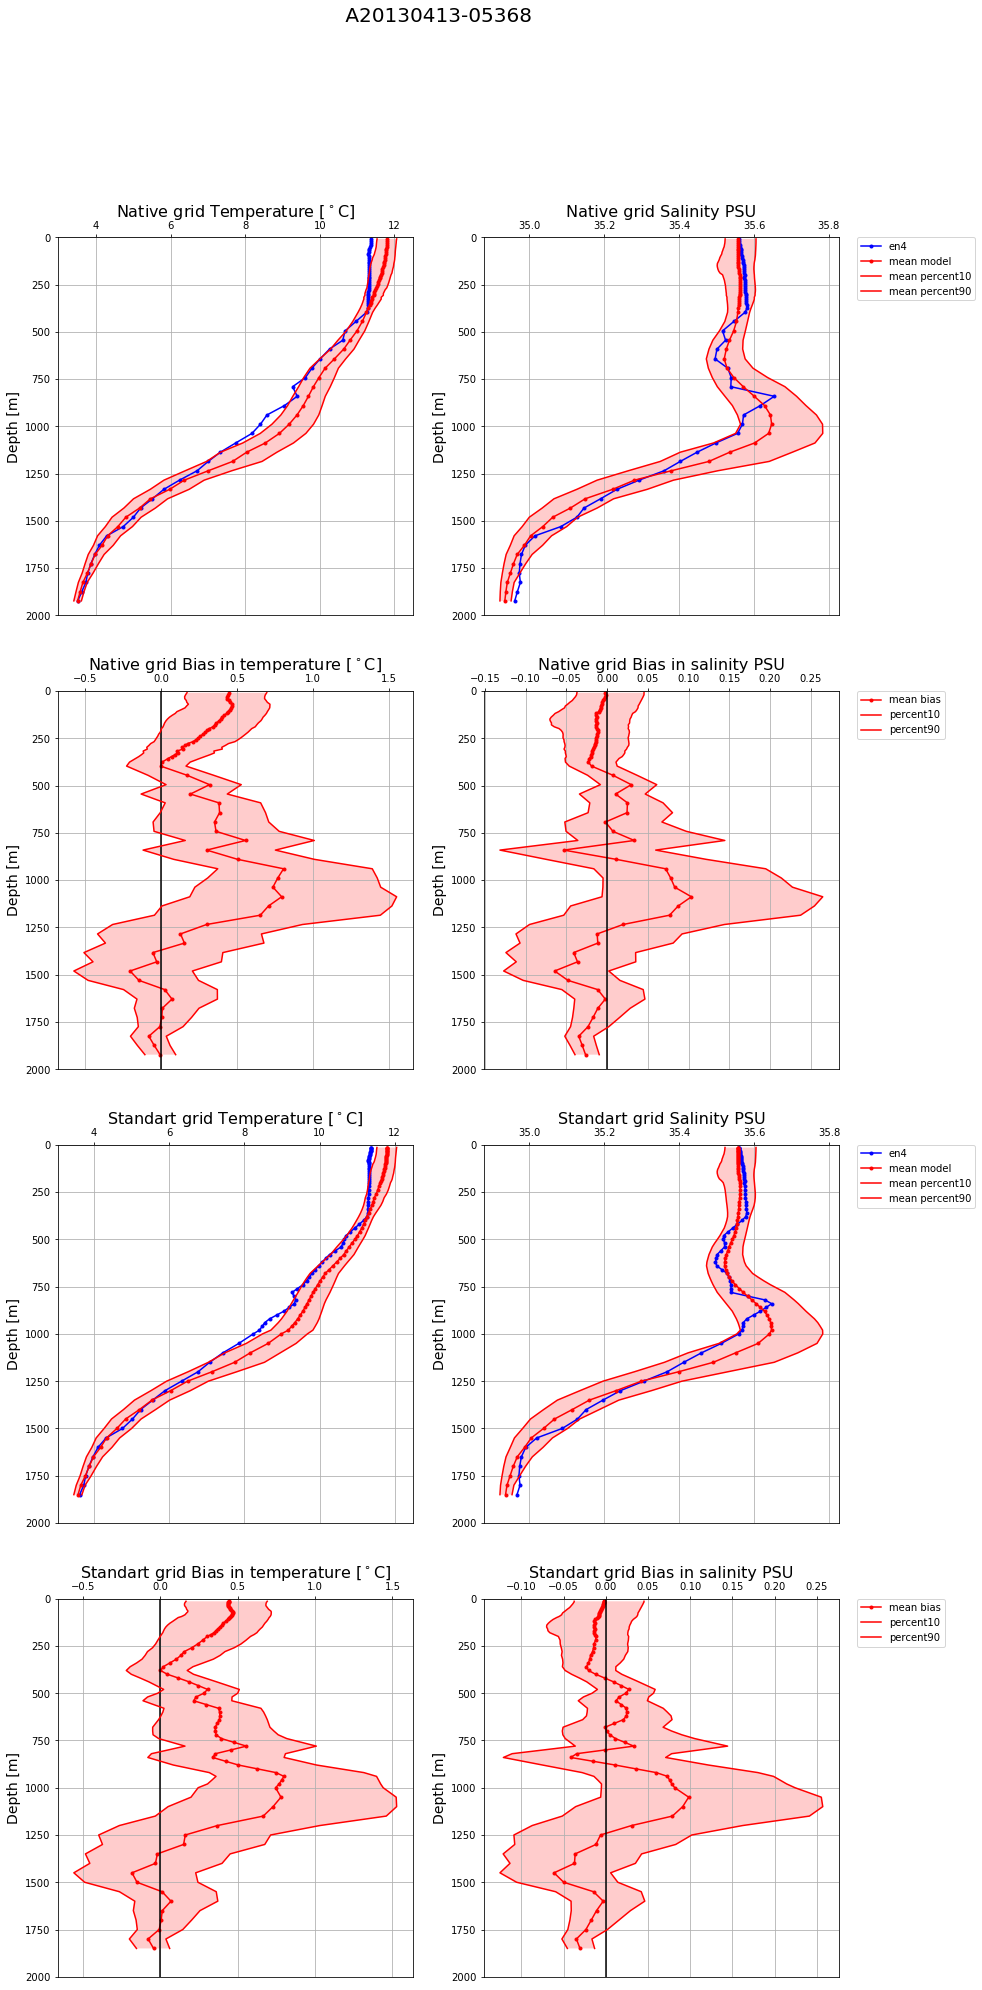

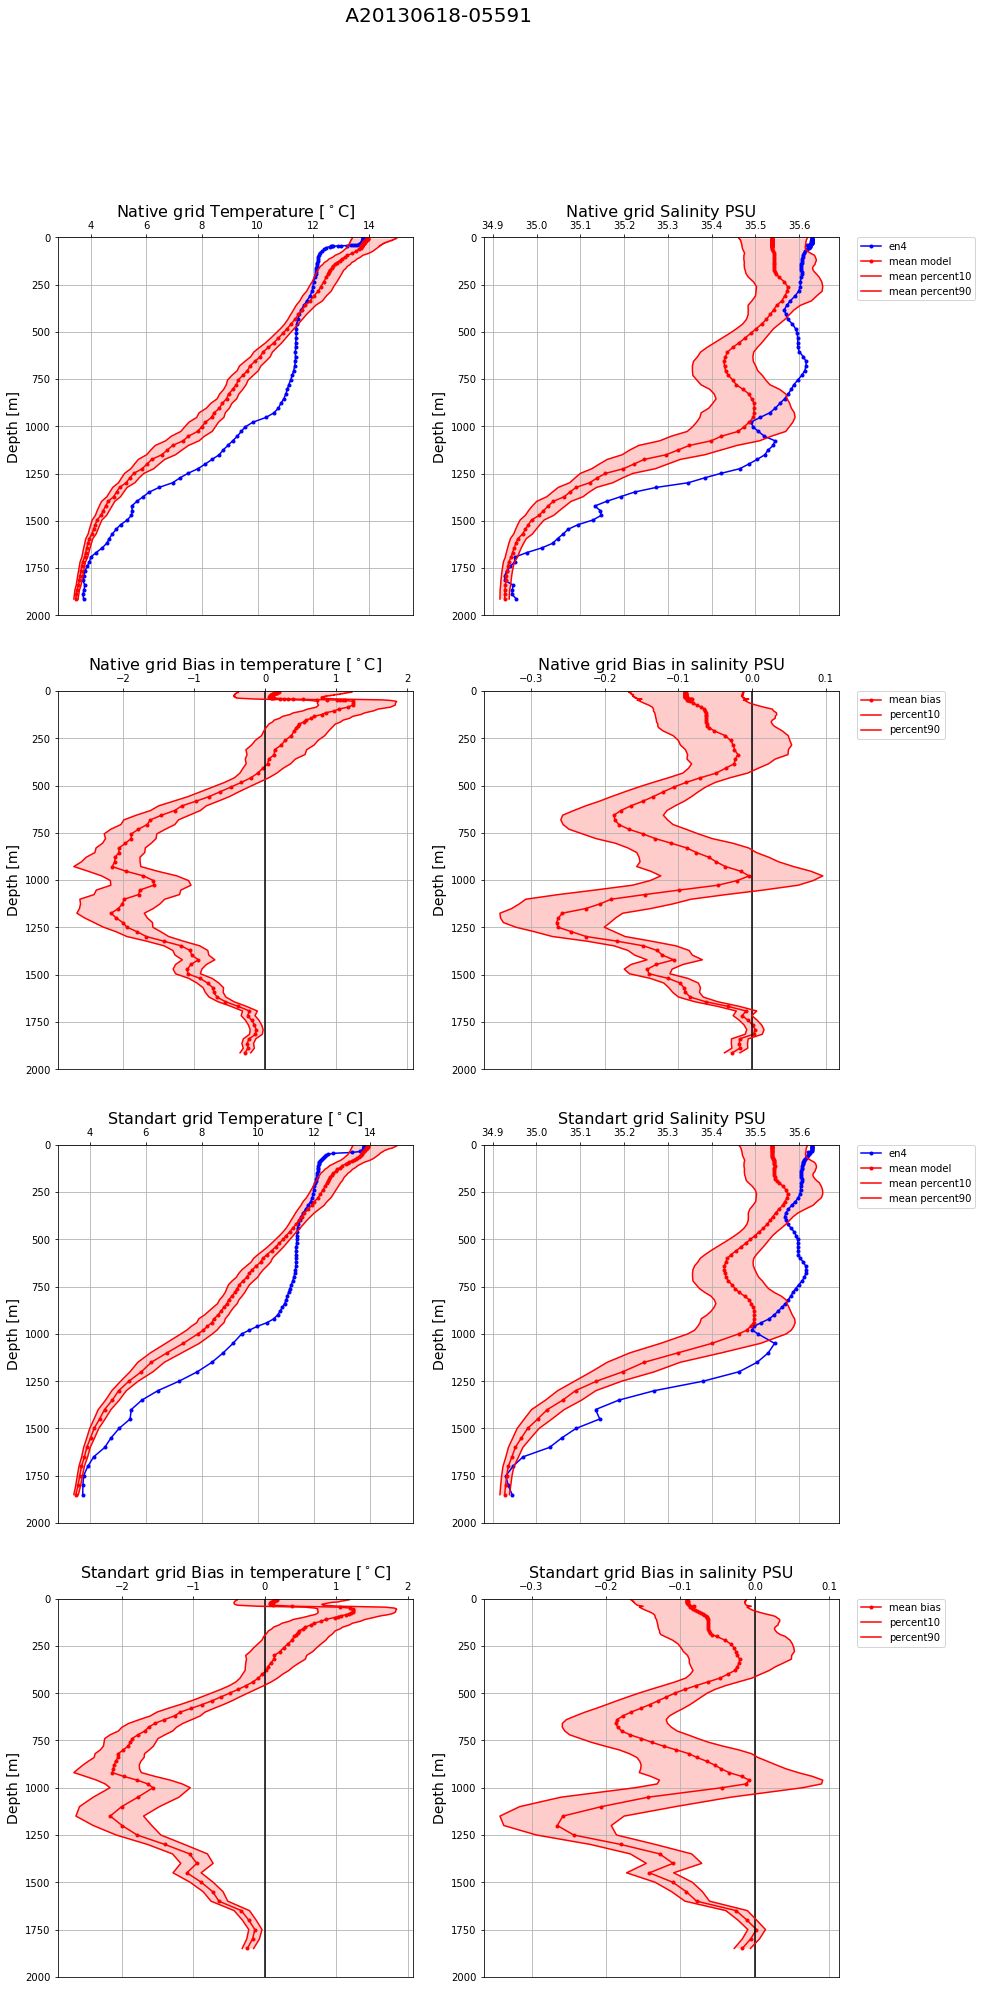

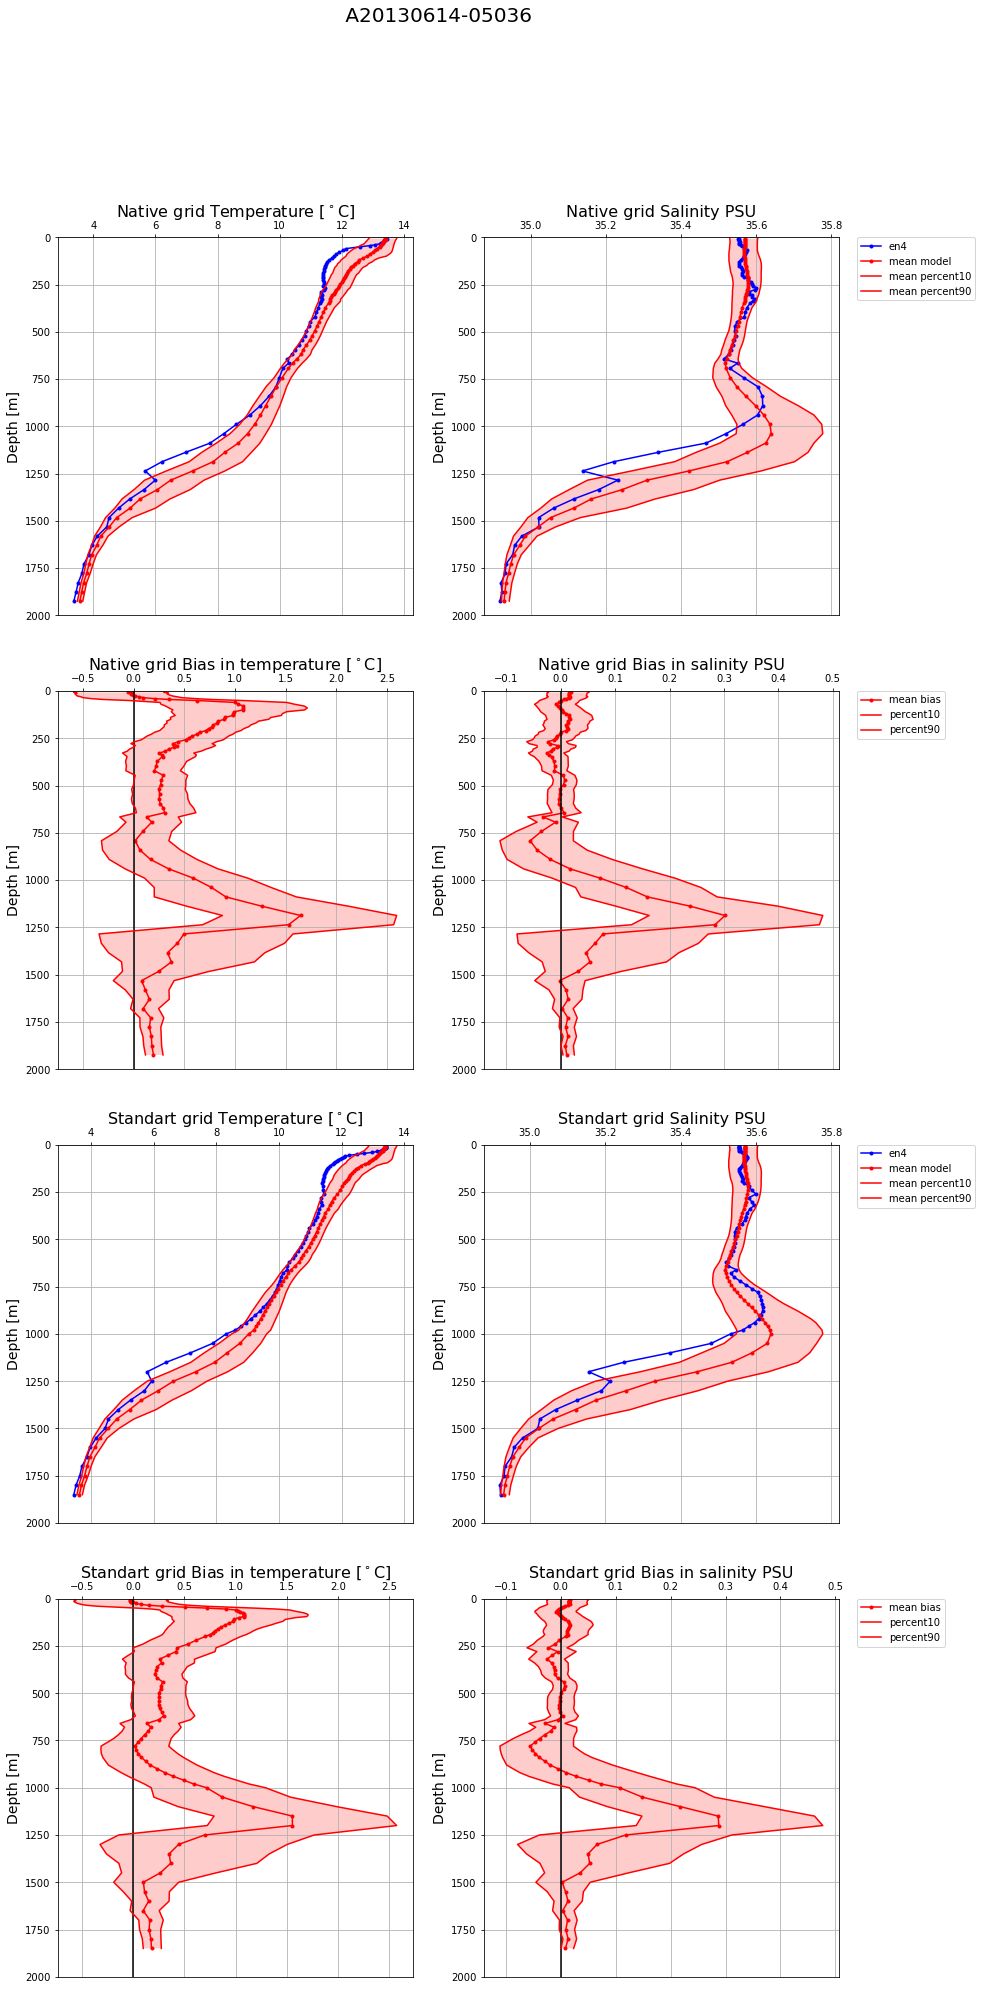

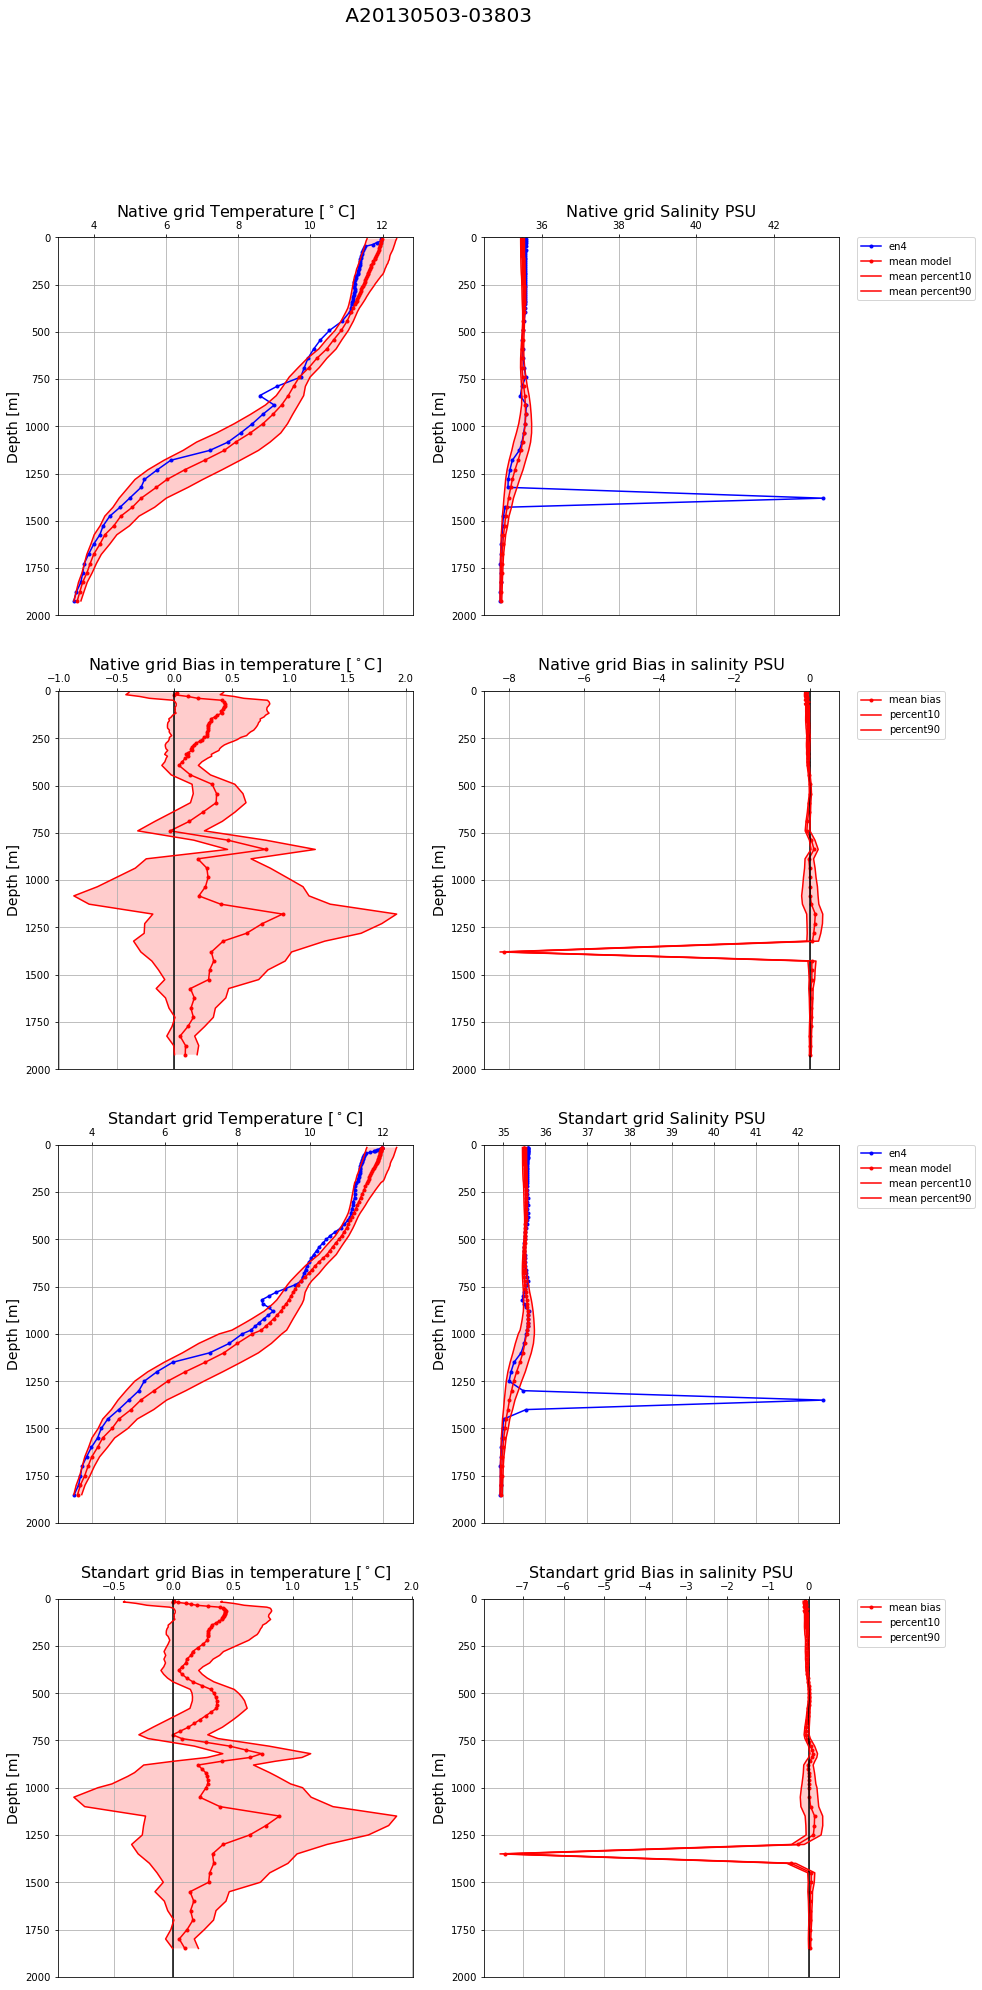

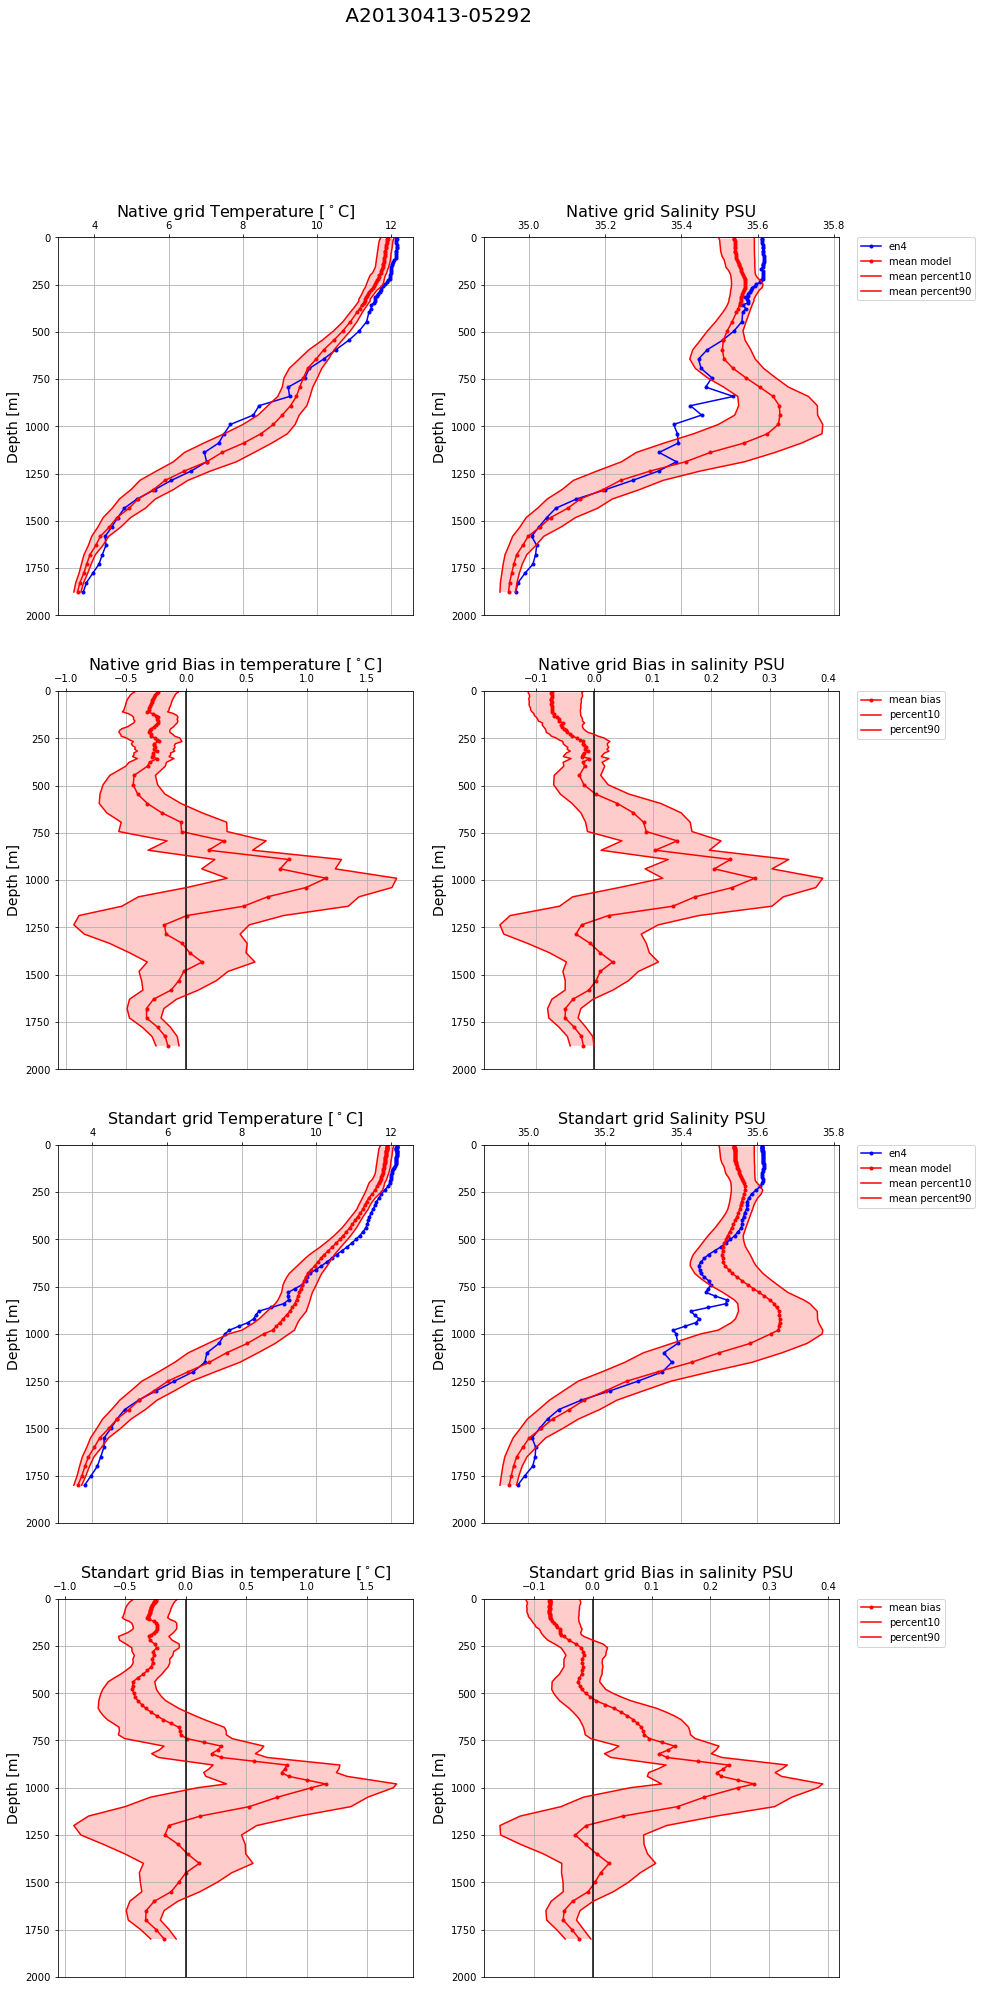

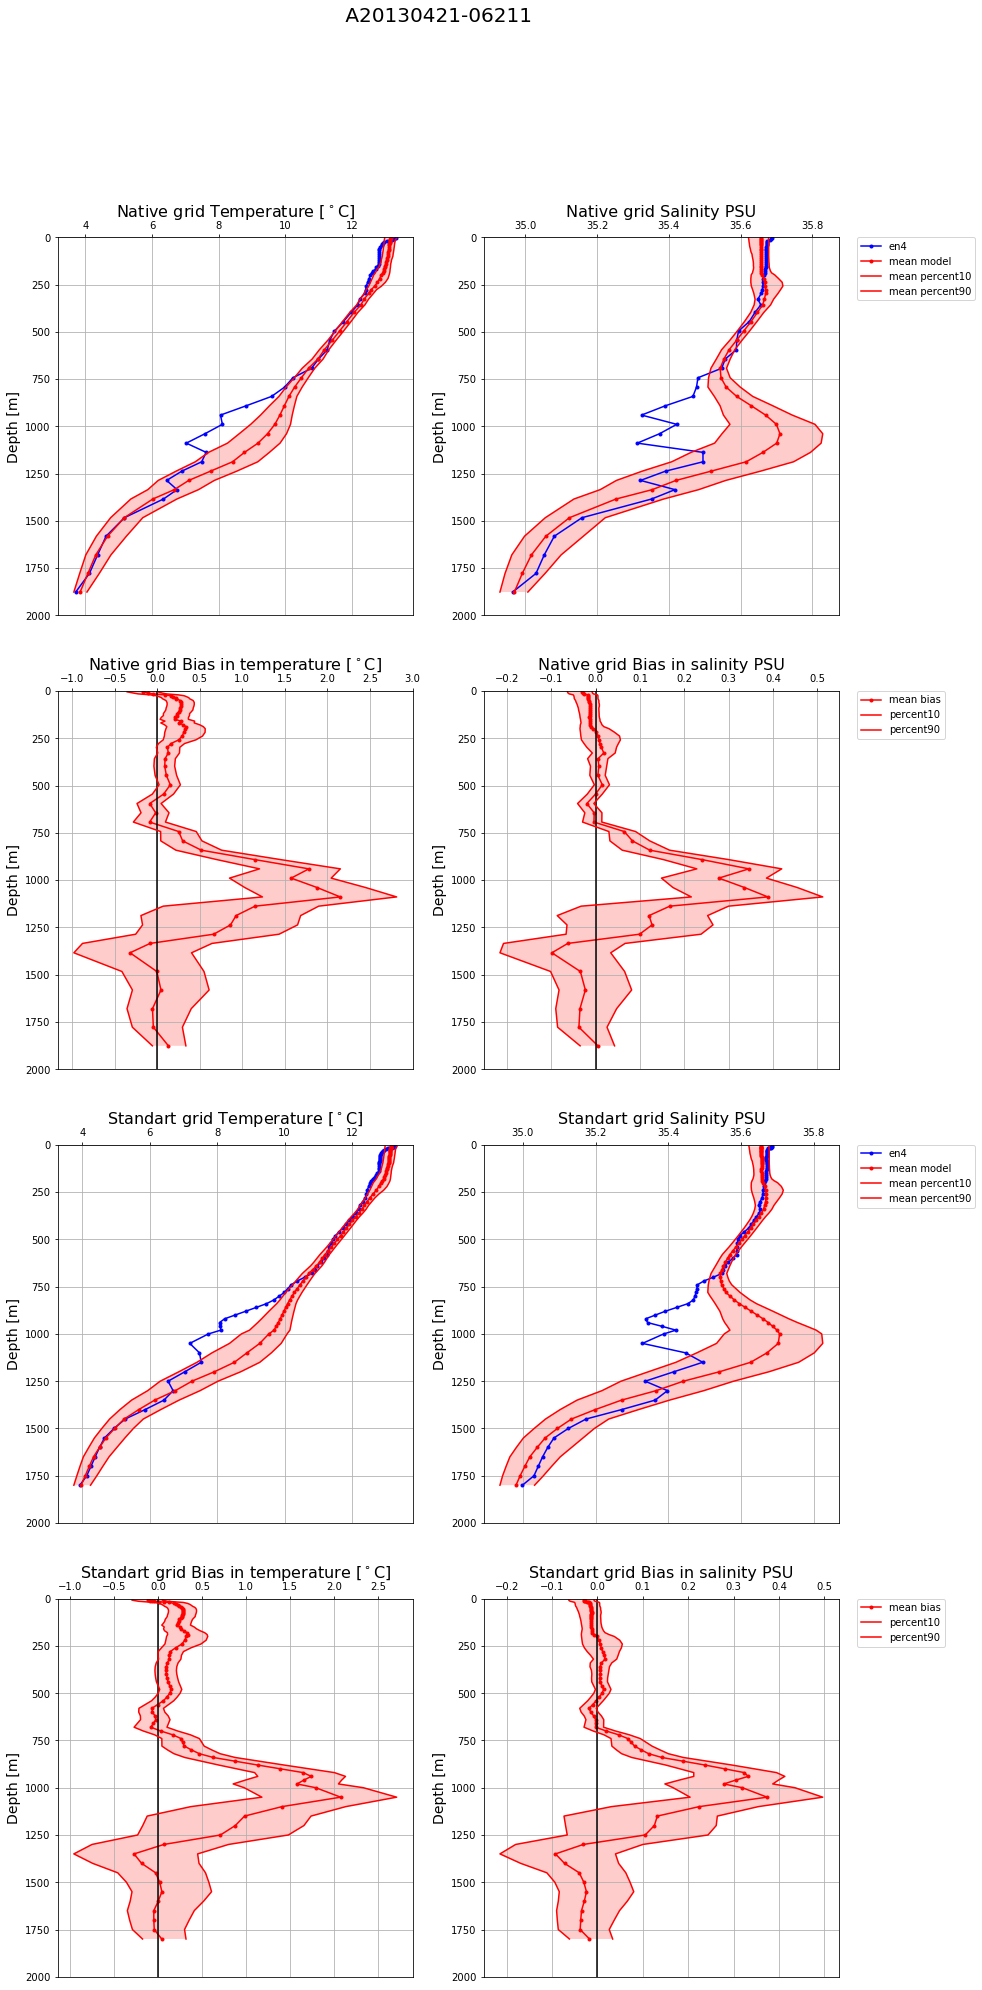

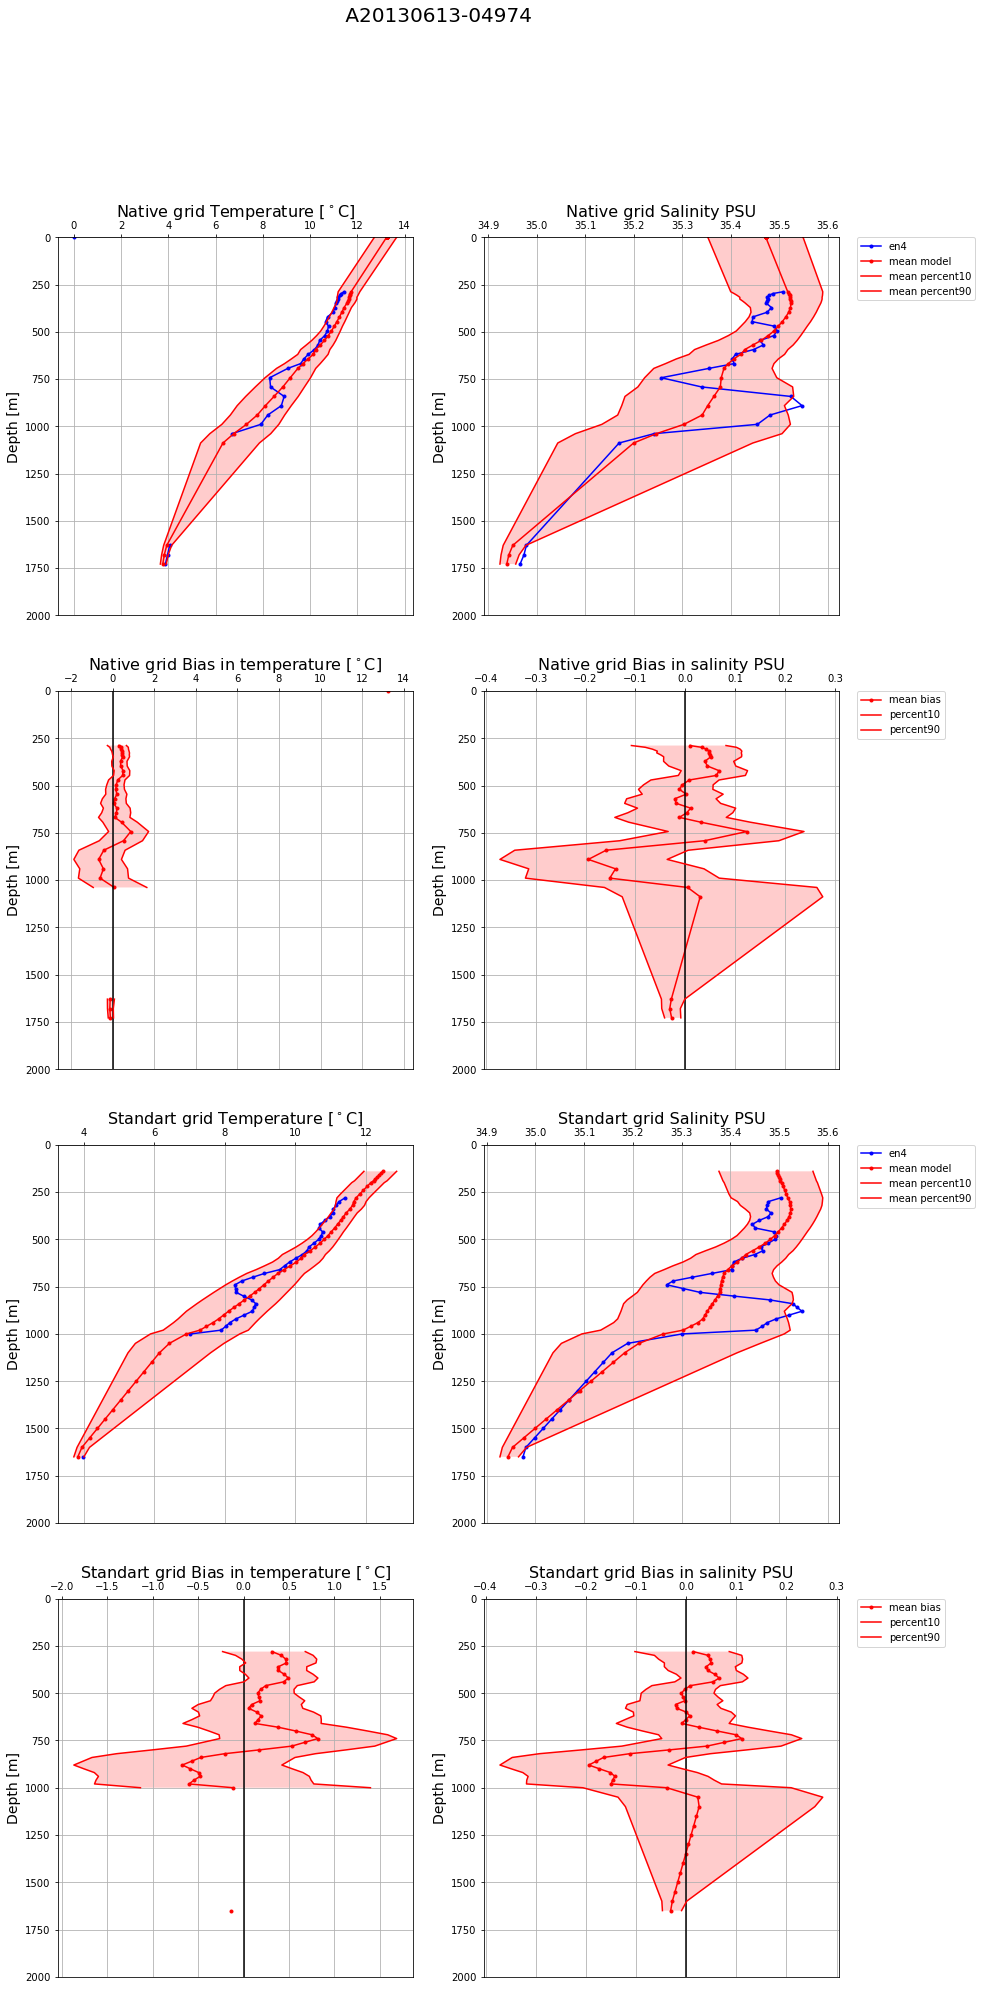

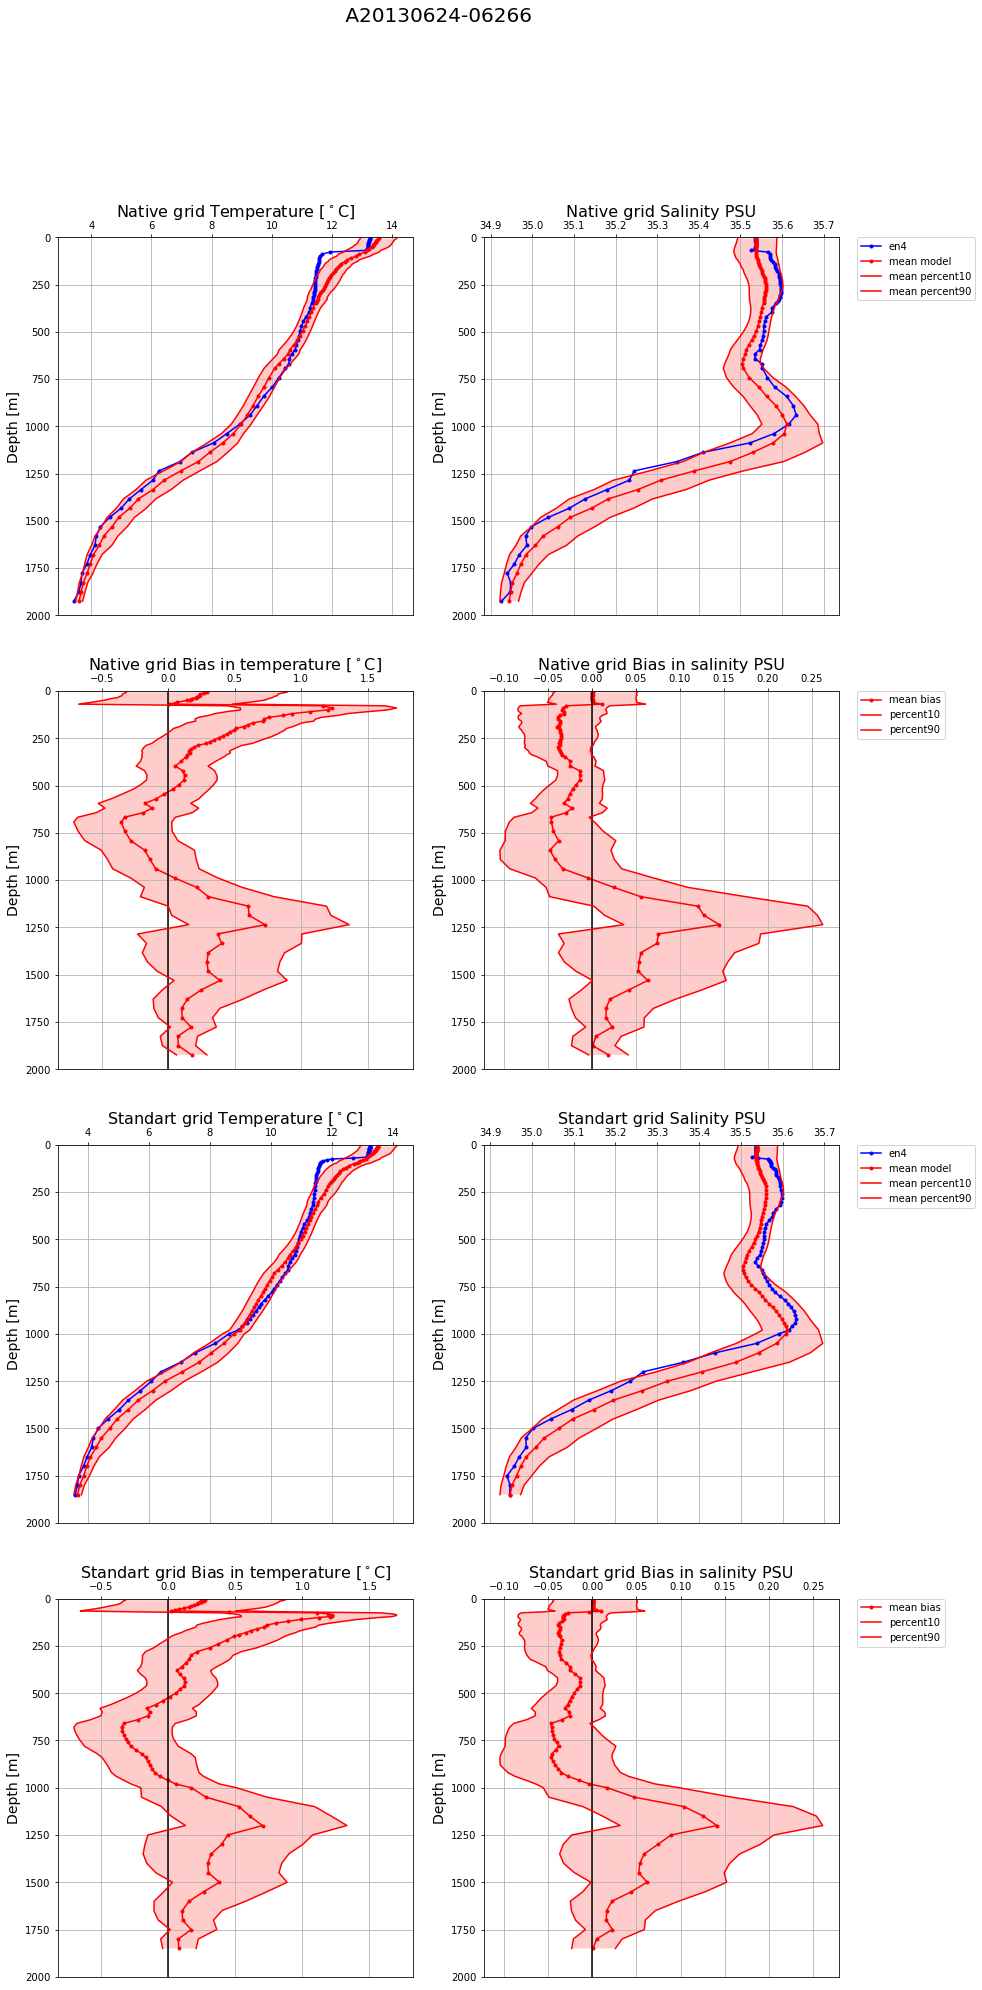

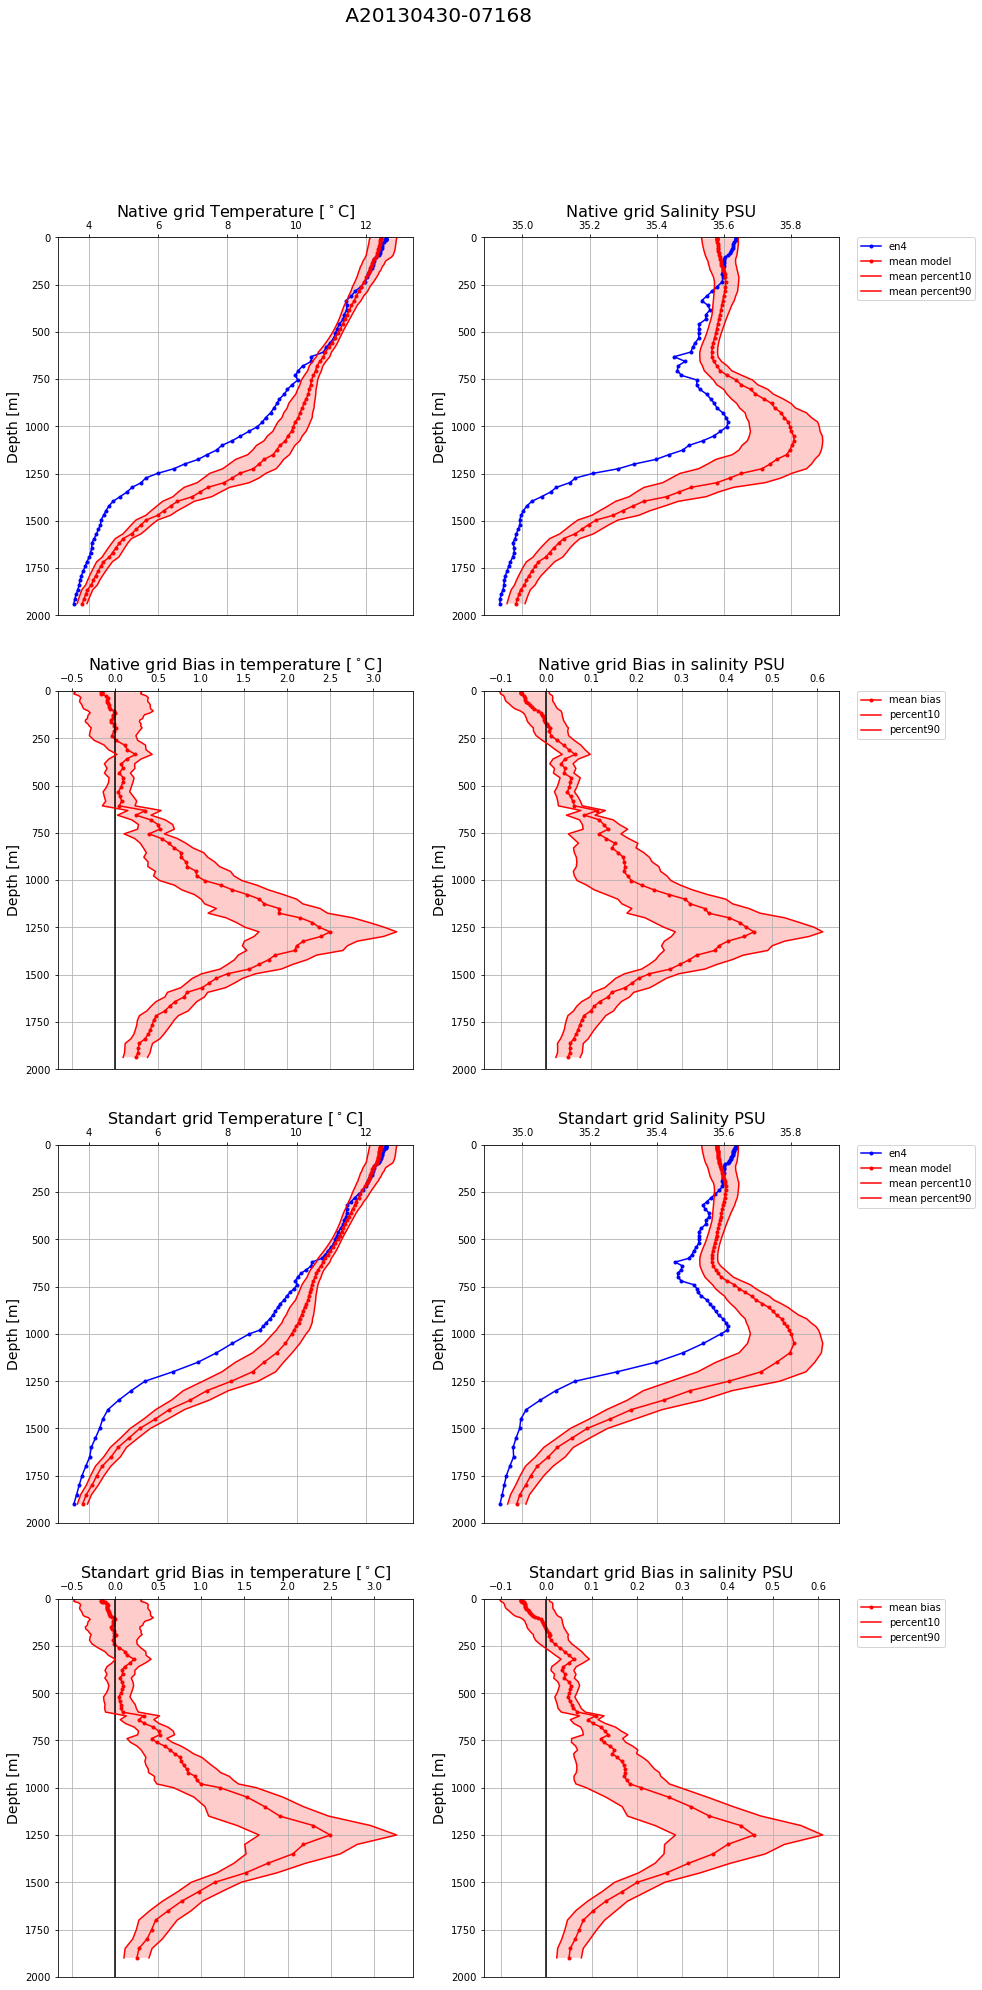

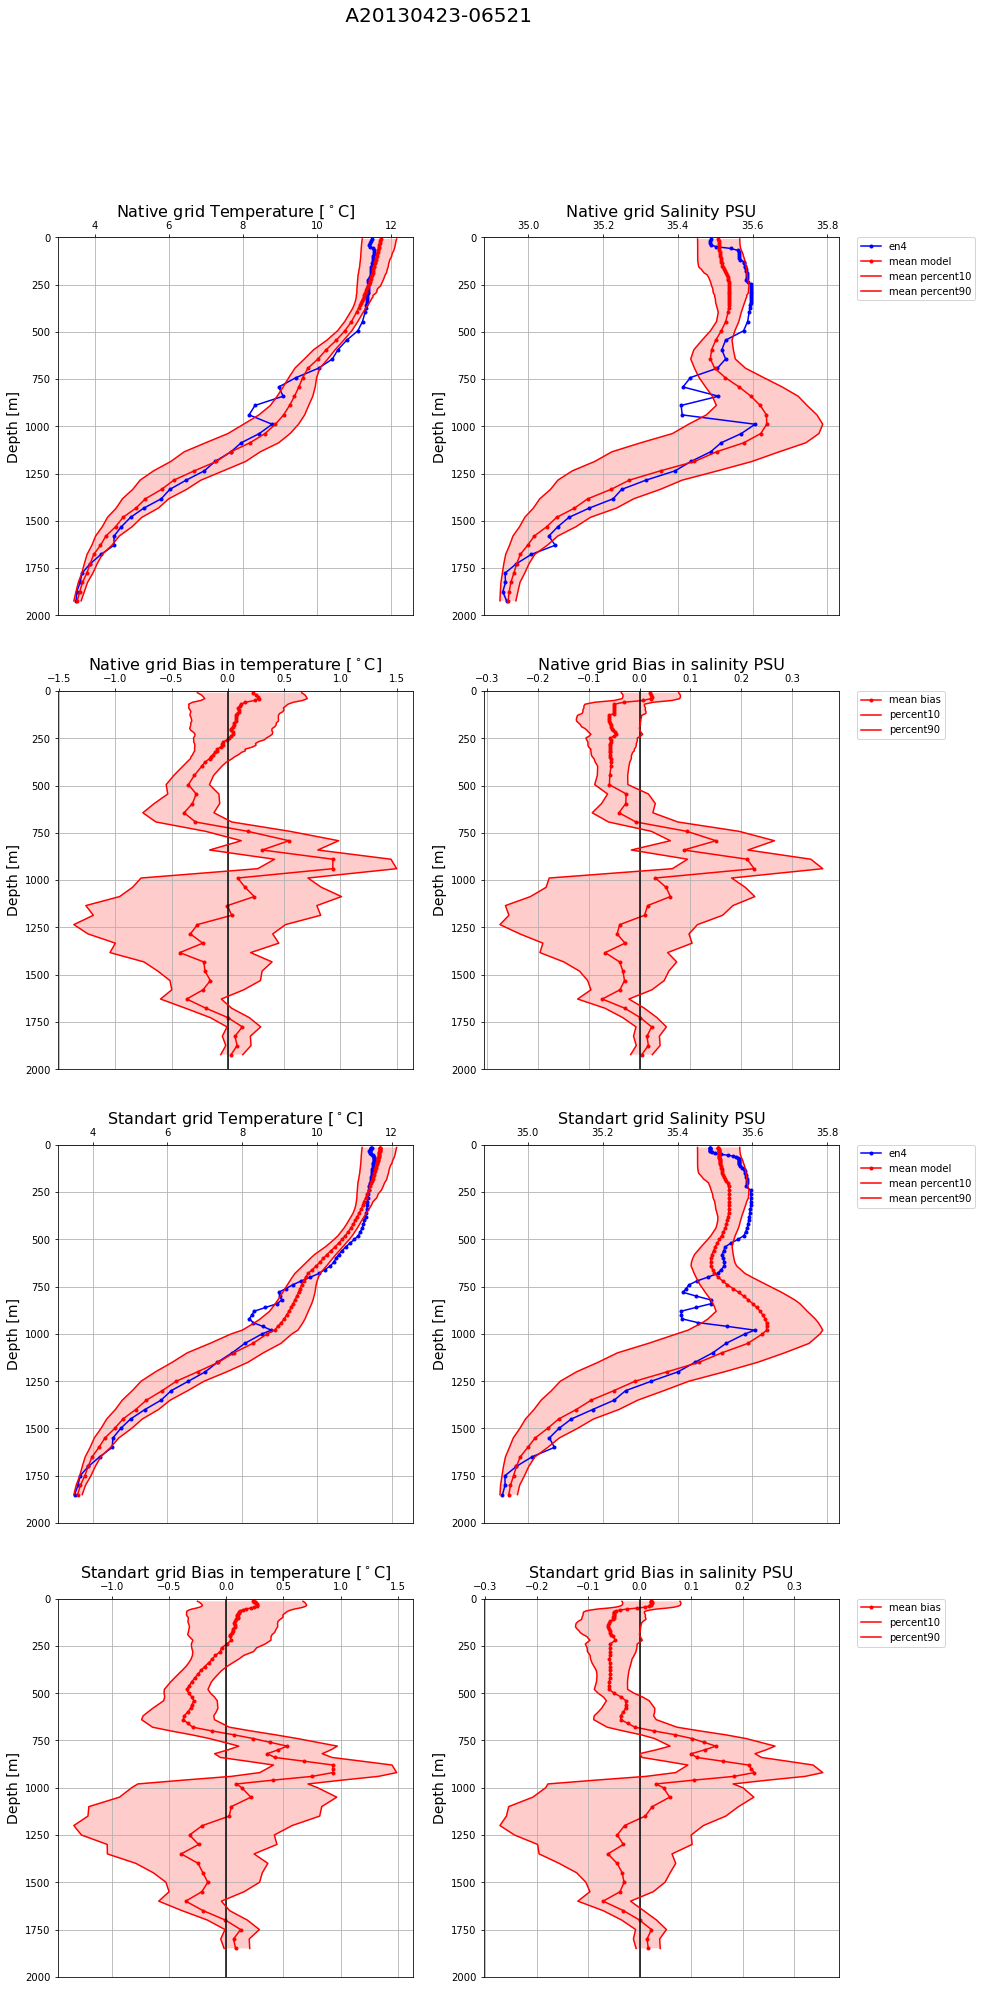

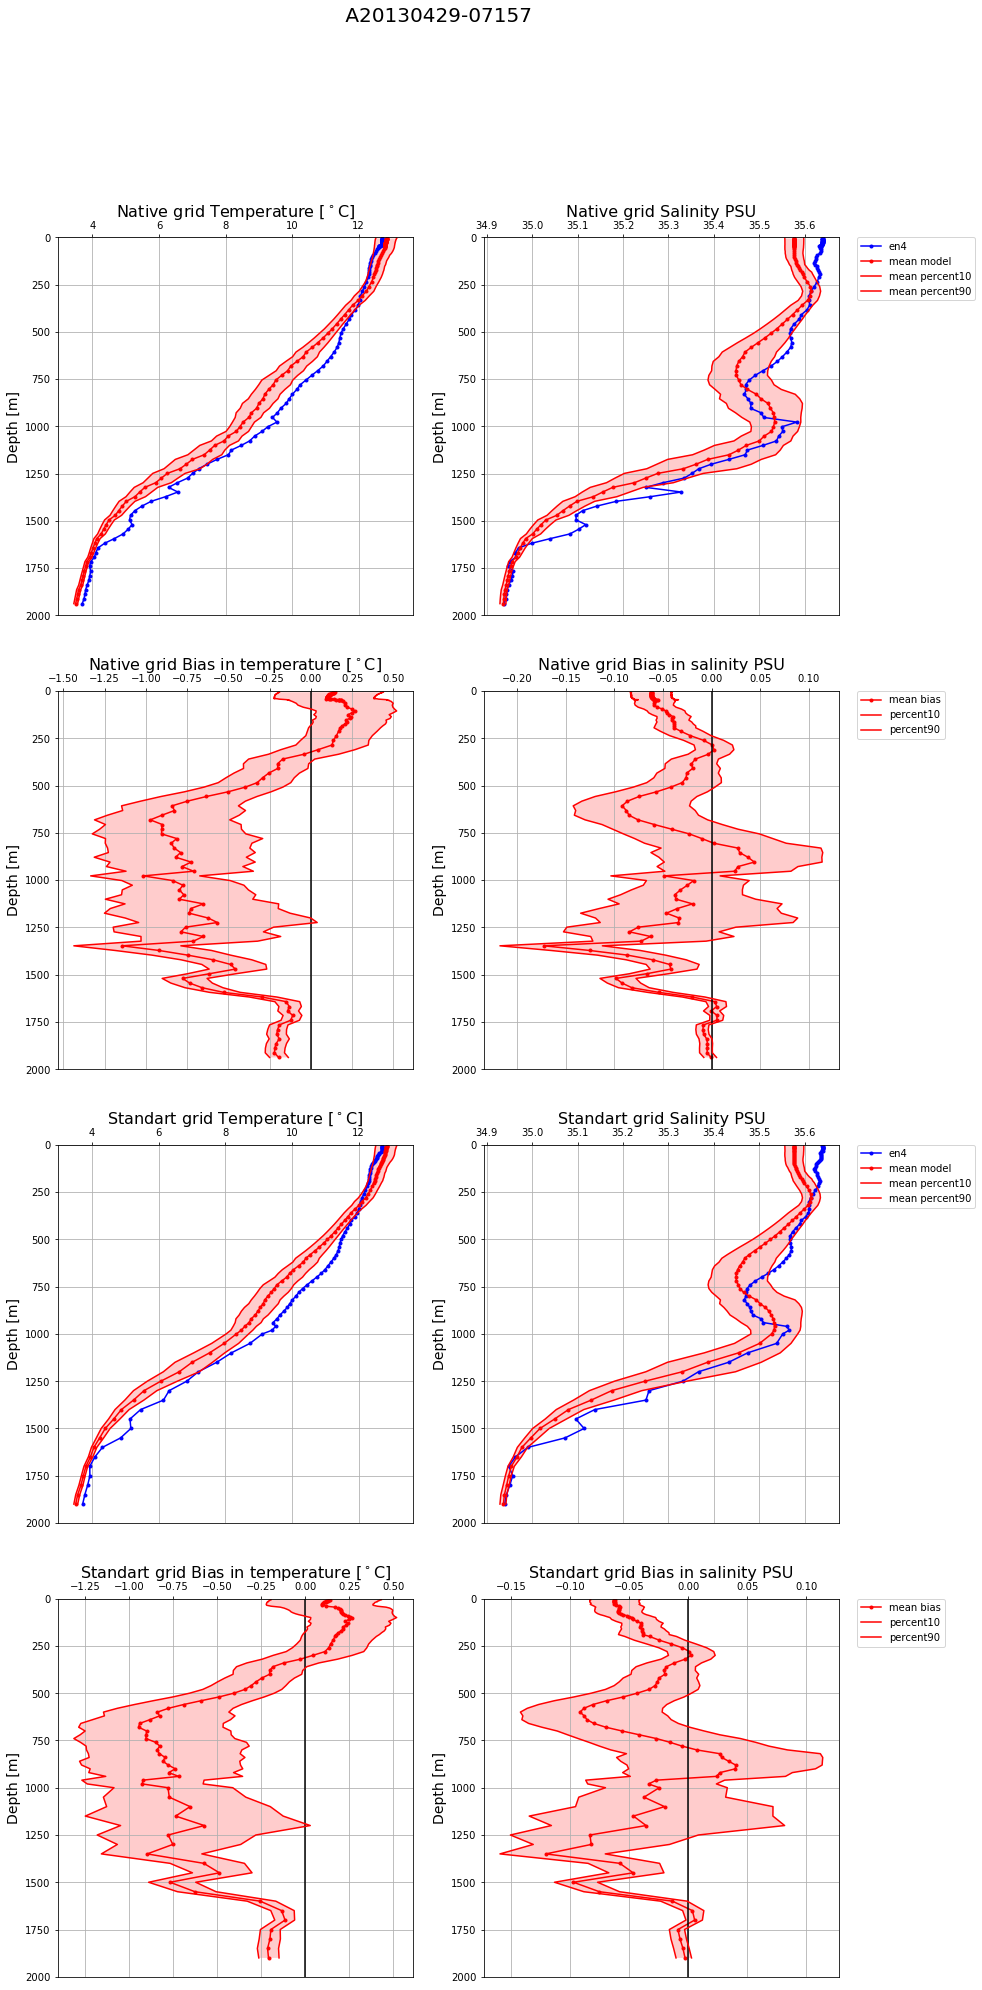

In [5]:
def get_netcdf_profiles(jsonfile,infos,prof,namezone):
        list_profiles = infos.keys()
        reference_profile = str(list_profiles[prof])
        print 'Getting profile ', reference_profile

        
        dirname="/media/extra/DATA/EN4/profiles_files/"+namezone

        netcdf_name=dirname+"/profiles_EN4-"+reference_profile[1:]+"_NATL60-CJM165_TS.nc"

        dsprof=xr.open_dataset(netcdf_name)

        depth_en4=dsprof['depth_en4']
        depth_model=dsprof['depth_model']
        temp_en4=dsprof['temp_profileEN4']
        salt_en4=dsprof['salt_profileEN4']
        mean_temp_model=dsprof['mean_temp_model']
        mean_salt_model=dsprof['mean_salt_model']
        percent10_temp_model=dsprof['percent10_temp_model']
        percent10_salt_model=dsprof['percent10_salt_model']
        percent90_temp_model=dsprof['percent90_temp_model']
        percent90_salt_model=dsprof['percent90_salt_model']



        return depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model

def project_standart_vertical_levels(depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model,vert_standart):

        temp_en4_standart=np.zeros(len(vert_standart))
        salt_en4_standart=np.zeros(len(vert_standart))
        mean_temp_model_standart=np.zeros(len(vert_standart))
        mean_salt_model_standart=np.zeros(len(vert_standart))
        percent10_temp_model_standart=np.zeros(len(vert_standart))
        percent10_salt_model_standart=np.zeros(len(vert_standart))
        percent90_temp_model_standart=np.zeros(len(vert_standart))
        percent90_salt_model_standart=np.zeros(len(vert_standart))

        for k in np.arange(len(vert_standart)-1):
            zs1=vert_standart[k]
            zs2=vert_standart[k+1]
            zs=(zs1+zs2)/2.
            idz=np.where(np.abs(depth_en4-zs)==np.min(np.abs(depth_en4-zs)))
            idz0=np.min(idz[0])
            if (idz0==0) | (idz0==len(depth_en4)-1):
                temp_en4_standart[k]='nan'
                salt_en4_standart[k]='nan'
                mean_temp_model_standart[k]='nan'
                mean_salt_model_standart[k]='nan'
                percent10_temp_model_standart[k]='nan'
                percent10_salt_model_standart[k]='nan'
                percent90_temp_model_standart[k]='nan'
                percent90_salt_model_standart[k]='nan'
            else:
                if depth_en4[idz0] < zs:
                    temp_en4_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * temp_en4[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * temp_en4[idz0+1]
                    salt_en4_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * salt_en4[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * salt_en4[idz0+1]
                    mean_temp_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * mean_temp_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * mean_temp_model[idz0+1]
                    mean_salt_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * mean_salt_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * mean_salt_model[idz0+1]
                    percent10_temp_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * percent10_temp_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * percent10_temp_model[idz0+1]
                    percent10_salt_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * percent10_salt_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * percent10_salt_model[idz0+1]
                    percent90_temp_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * percent90_temp_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * percent90_temp_model[idz0+1]
                    percent90_salt_model_standart[k]=(1 - (zs-depth_en4[idz0])/(depth_en4[idz0+1]-depth_en4[idz0])) * percent90_salt_model[idz0] + (1 - (depth_en4[idz0+1] - zs)/(depth_en4[idz0+1]-depth_en4[idz0])) * percent90_salt_model[idz0+1]
                    
                if depth_en4[idz0] > zs:
                    temp_en4_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * temp_en4[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * temp_en4[idz0]
                    salt_en4_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * salt_en4[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * salt_en4[idz0]
                    mean_temp_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * mean_temp_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * mean_temp_model[idz0]
                    mean_salt_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * mean_salt_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * mean_salt_model[idz0]
                    percent10_temp_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * percent10_temp_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * percent10_temp_model[idz0]
                    percent10_salt_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * percent10_salt_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * percent10_salt_model[idz0]
                    percent90_temp_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * percent90_temp_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * percent90_temp_model[idz0]
                    percent90_salt_model_standart[k]=(1 - (zs-depth_en4[idz0-1])/(depth_en4[idz0]-depth_en4[idz0-1])) * percent90_salt_model[idz0-1] + (1 - (depth_en4[idz0] - zs)/(depth_en4[idz0]-depth_en4[idz0-1])) * percent90_salt_model[idz0]



        return temp_en4_standart,salt_en4_standart,mean_temp_model_standart,mean_salt_model_standart,percent10_temp_model_standart,percent10_salt_model_standart,percent90_temp_model_standart,percent90_salt_model_standart

def plot_profiles_native_vert_grid(k,depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model,temp_en4_standart,salt_en4_standart,mean_temp_model_standart,mean_salt_model_standart,percent10_temp_model_standart,percent10_salt_model_standart,percent90_temp_model_standart,percent90_salt_model_standart,namezone):    
    
    dirname="/media/extra/DATA/EN4/profiles_files/"+namezone
    list_profiles = infos.keys()


    gs = gridspec.GridSpec(4, 2, width_ratios=[1,1], height_ratios=[2,2,2,2])
    fig1 = plt.figure(figsize=(14, 32))  # (w,h)

    ax1 = plt.subplot(gs[0,0])

    ax1.plot(temp_en4,depth_en4,'b.-', label='en4')
    ax1.set_xlabel('Native grid Temperature [$^\circ$C]', size=16)
    ax1.set_ylabel('Depth [m]', size=14)
    ax1.set_ylim(2000, 0)
    ax1.grid(True, which='both')
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top') 
    ax1.plot(mean_temp_model,depth_en4,'r.-', label='mean model')
    ax1.plot(percent10_temp_model,depth_en4,'r-', label='mean percent10')
    ax1.plot(percent90_temp_model,depth_en4,'r-', label='mean percent90')
    ax1.fill_betweenx(depth_en4, percent10_temp_model, x2=percent90_temp_model, alpha=0.2, facecolor='r')

    ax2 = plt.subplot(gs[0,1])

    ax2.plot(salt_en4,depth_en4,'b.-', label='en4')
    ax2.set_xlabel('Native grid Salinity PSU', size=16)
    ax2.set_ylabel('Depth [m]', size=14)
    ax2.set_ylim(2000, 0)
    ax2.grid(True, which='both')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top') 
    ax2.plot(mean_salt_model,depth_en4,'r.-', label='mean model')
    ax2.plot(percent10_salt_model,depth_en4,'r-', label='mean percent10')
    ax2.plot(percent90_salt_model,depth_en4,'r-', label='mean percent90')
    ax2.fill_betweenx(depth_en4, percent10_salt_model, x2=percent90_salt_model, alpha=0.2, facecolor='r')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax3 = plt.subplot(gs[1,0])

    ax3.plot(mean_temp_model-temp_en4,depth_en4,'r.-', label='mean bias')
    ax3.set_xlabel('Native grid Bias in temperature [$^\circ$C]', size=16)
    ax3.set_ylabel('Depth [m]', size=14)
    ax3.set_ylim(2000, 0)
    ax3.grid(True, which='both')
    ax3.xaxis.tick_top()
    ax3.xaxis.set_label_position('top') 
    ax3.axvline(0,color='k')
    ax3.plot(percent10_temp_model-temp_en4,depth_en4,'r-', label='percent10')
    ax3.plot(percent90_temp_model-temp_en4,depth_en4,'r-', label='percent90')
    ax3.fill_betweenx(depth_en4, percent10_temp_model-temp_en4, x2=percent90_temp_model-temp_en4, alpha=0.2, facecolor='r')

    ax4 = plt.subplot(gs[1,1])

    ax4.plot(mean_salt_model-salt_en4,depth_en4,'r.-', label='mean bias')
    ax4.set_xlabel('Native grid Bias in salinity PSU', size=16)
    ax4.set_ylabel('Depth [m]', size=14)
    ax4.set_ylim(2000, 0)
    ax4.grid(True, which='both')
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top') 
    ax4.axvline(0,color='k')
    ax4.plot(percent10_salt_model-salt_en4,depth_en4,'r-', label='percent10')
    ax4.plot(percent90_salt_model-salt_en4,depth_en4,'r-', label='percent90')
    ax4.fill_betweenx(depth_en4, percent10_salt_model-salt_en4, x2=percent90_salt_model-salt_en4, alpha=0.2, facecolor='r')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    mean_temp_model_standart[mean_temp_model_standart==0.]='nan'
    mean_salt_model_standart[mean_salt_model_standart==0.]='nan'
    temp_en4_standart[temp_en4_standart==0.]='nan'
    salt_en4_standart[salt_en4_standart==0.]='nan'
    percent10_temp_model_standart[percent10_temp_model_standart==0.]='nan'
    percent10_salt_model_standart[percent10_salt_model_standart==0.]='nan'
    percent90_temp_model_standart[percent90_temp_model_standart==0.]='nan'
    percent90_salt_model_standart[percent90_salt_model_standart==0.]='nan'

    ax1 = plt.subplot(gs[2,0])

    ax1.plot(temp_en4_standart,vert_standart,'b.-', label='en4')
    ax1.set_xlabel('Standart grid Temperature [$^\circ$C]', size=16)
    ax1.set_ylabel('Depth [m]', size=14)
    ax1.set_ylim(2000, 0)
    ax1.grid(True, which='both')
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top') 
    ax1.plot(mean_temp_model_standart,vert_standart,'r.-', label='mean model')
    ax1.plot(percent10_temp_model_standart,vert_standart,'r-', label='mean percent10')
    ax1.plot(percent90_temp_model_standart,vert_standart,'r-', label='mean percent90')
    ax1.fill_betweenx(vert_standart, percent10_temp_model_standart, x2=percent90_temp_model_standart, alpha=0.2, facecolor='r')

    ax2 = plt.subplot(gs[2,1])

    ax2.plot(salt_en4_standart,vert_standart,'b.-', label='en4')
    ax2.set_xlabel('Standart grid Salinity PSU', size=16)
    ax2.set_ylabel('Depth [m]', size=14)
    ax2.set_ylim(2000, 0)
    ax2.grid(True, which='both')
    ax2.xaxis.tick_top()
    ax2.xaxis.set_label_position('top') 
    ax2.plot(mean_salt_model_standart,vert_standart,'r.-', label='mean model')
    ax2.plot(percent10_salt_model_standart,vert_standart,'r-', label='mean percent10')
    ax2.plot(percent90_salt_model_standart,vert_standart,'r-', label='mean percent90')
    ax2.fill_betweenx(vert_standart, percent10_salt_model_standart, x2=percent90_salt_model_standart, alpha=0.2, facecolor='r')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    ax3 = plt.subplot(gs[3,0])

    ax3.plot(mean_temp_model_standart-temp_en4_standart,vert_standart,'r.-', label='mean bias')
    ax3.set_xlabel('Standart grid Bias in temperature [$^\circ$C]', size=16)
    ax3.set_ylabel('Depth [m]', size=14)
    ax3.set_ylim(2000, 0)
    ax3.grid(True, which='both')
    ax3.xaxis.tick_top()
    ax3.xaxis.set_label_position('top') 
    ax3.axvline(0,color='k')
    ax3.plot(percent10_temp_model_standart-temp_en4_standart,vert_standart,'r-', label='percent10')
    ax3.plot(percent90_temp_model_standart-temp_en4_standart,vert_standart,'r-', label='percent90')
    ax3.fill_betweenx(vert_standart, percent10_temp_model_standart-temp_en4_standart, x2=percent90_temp_model_standart-temp_en4_standart, alpha=0.2, facecolor='r')

    ax4 = plt.subplot(gs[3,1])

    ax4.plot(mean_salt_model_standart-salt_en4_standart,vert_standart,'r.-', label='mean bias')
    ax4.set_xlabel('Standart grid Bias in salinity PSU', size=16)
    ax4.set_ylabel('Depth [m]', size=14)
    ax4.set_ylim(2000, 0)
    ax4.grid(True, which='both')
    ax4.xaxis.tick_top()
    ax4.xaxis.set_label_position('top') 
    ax4.axvline(0,color='k')
    ax4.plot(percent10_salt_model_standart-salt_en4_standart,vert_standart,'r-', label='percent10')
    ax4.plot(percent90_salt_model_standart-salt_en4_standart,vert_standart,'r-', label='percent90')
    ax4.fill_betweenx(vert_standart, percent10_salt_model_standart-salt_en4_standart, x2=percent90_salt_model_standart-salt_en4_standart, alpha=0.2, facecolor='r')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)


    reference_profile = str(list_profiles[k])
    plt.suptitle(reference_profile, size=20);
    plt.savefig(dirname+'/plot_bias_native_vert_'+reference_profile[1:-1]+'.png')

    
print time.strftime('%d/%m/%y %H:%M',time.localtime())

all_temp_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_mean_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_en4=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_percent10_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_temp_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))
all_salt_percent90_model=np.zeros((nb_profilesEN4,len(vert_standart)))

for prof in np.arange(nb_profilesEN4):
    depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model = get_netcdf_profiles(jsonfile,infos,prof,'osmo')
    if depth_en4[-1] > 1250:
        temp_en4_standart,salt_en4_standart,mean_temp_model_standart,mean_salt_model_standart,percent10_temp_model_standart,percent10_salt_model_standart,percent90_temp_model_standart,percent90_salt_model_standart = project_standart_vertical_levels(depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model,vert_standart)
        plot_profiles_native_vert_grid(prof,depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model,temp_en4_standart,salt_en4_standart,mean_temp_model_standart,mean_salt_model_standart,percent10_temp_model_standart,percent10_salt_model_standart,percent90_temp_model_standart,percent90_salt_model_standart,'osmo')
        all_temp_mean_model[prof,:]=mean_temp_model_standart[:]
        all_salt_mean_model[prof,:]=mean_salt_model_standart[:]
        all_temp_en4[prof,:]=temp_en4_standart[:]
        all_salt_en4[prof,:]=salt_en4_standart[:]
        all_temp_percent10_model[prof,:]=percent10_temp_model_standart[:]
        all_salt_percent10_model[prof,:]=percent10_salt_model_standart[:]
        all_temp_percent90_model[prof,:]=percent90_temp_model_standart[:]
        all_salt_percent90_model[prof,:]=percent90_salt_model_standart[:]


print time.strftime('%d/%m/%y %H:%M',time.localtime())


In [45]:
def get_netcdf_profiles(jsonfile,infos,prof):
        list_profiles = infos.keys()
        reference_profile = str(list_profiles[prof])
        print 'Getting profile ', reference_profile

        namezone=jsonfile[0:-5]
        dirname="/media/extra/DATA/EN4/profiles_files/"+namezone

        netcdf_name=dirname+"/profiles_EN4-"+reference_profile[1:-1]+"_NATL60-CJM165_TS.nc"

        dsprof=xr.open_dataset(netcdf_name)

        depth_en4=dsprof['depth_en4'].values
        depth_model=dsprof['depth_model'].values
        temp_en4=dsprof['temp_profileEN4'].values
        salt_en4=dsprof['salt_profileEN4'].values
        mean_temp_model=dsprof['mean_temp_model'].values
        mean_salt_model=dsprof['mean_salt_model'].values
        percent10_temp_model=dsprof['percent10_temp_model'].values
        percent10_salt_model=dsprof['percent10_salt_model'].values
        percent90_temp_model=dsprof['percent90_temp_model'].values
        percent90_salt_model=dsprof['percent90_salt_model'].values



        return depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model

def project_standart_vertical_levels(depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model,vert_standart):

        temp_en4_standart=np.zeros(len(vert_standart))
        salt_en4_standart=np.zeros(len(vert_standart))
        mean_temp_model_standart=np.zeros(len(vert_standart))
        mean_salt_model_standart=np.zeros(len(vert_standart))
        percent10_temp_model_standart=np.zeros(len(vert_standart))
        percent10_salt_model_standart=np.zeros(len(vert_standart))
        percent90_temp_model_standart=np.zeros(len(vert_standart))
        percent90_salt_model_standart=np.zeros(len(vert_standart))

        for k in np.arange(len(vert_standart)-1):
            zs1=vert_standart[k]
            zs2=vert_standart[k+1]
            zs=(zs1+zs2)/2.
            idz=np.where(np.abs(depth_en4-zs)==np.min(np.abs(depth_en4-zs)))
            if (idz[0]==0) | (idz[0]==len(depth_en4)-1):
                print k,zs,idz[0]
                temp_en4_standart[k]='nan'
                salt_en4_standart[k]='nan'
                mean_temp_model_standart[k]='nan'
                mean_salt_model_standart[k]='nan'
                percent10_temp_model_standart[k]='nan'
                percent10_salt_model_standart[k]='nan'
                percent90_temp_model_standart[k]='nan'
                percent90_salt_model_standart[k]='nan'
            else:

                if depth_en4[idz[0]] < zs:
                    temp_en4_standart[k]=(1 - (zs-depth_en4[idz[0]])/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * temp_en4[idz[0]] + (1 - (depth_en4[idz[0]+1] - zs)/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * temp_en4[idz[0]+1]
                    salt_en4_standart[k]=(1 - (zs-depth_en4[idz[0]])/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * salt_en4[idz[0]] + (1 - (depth_en4[idz[0]+1] - zs)/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * salt_en4[idz[0]+1]
                    mean_temp_model_standart[k]=(1 - (zs-depth_en4[idz[0]])/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * mean_temp_model[idz[0]] + (1 - (depth_en4[idz[0]+1] - zs)/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * mean_temp_model[idz[0]+1]
                    mean_salt_model_standart[k]=(1 - (zs-depth_en4[idz[0]])/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * mean_salt_model[idz[0]] + (1 - (depth_en4[idz[0]+1] - zs)/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * mean_salt_model[idz[0]+1]
                    percent10_temp_model_standart[k]=(1 - (zs-depth_en4[idz[0]])/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * percent10_temp_model[idz[0]] + (1 - (depth_en4[idz[0]+1] - zs)/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * percent10_temp_model[idz[0]+1]
                    percent10_salt_model_standart[k]=(1 - (zs-depth_en4[idz[0]])/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * percent10_salt_model[idz[0]] + (1 - (depth_en4[idz[0]+1] - zs)/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * percent10_salt_model[idz[0]+1]
                    percent90_temp_model_standart[k]=(1 - (zs-depth_en4[idz[0]])/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * percent90_temp_model[idz[0]] + (1 - (depth_en4[idz[0]+1] - zs)/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * percent90_temp_model[idz[0]+1]
                    percent90_salt_model_standart[k]=(1 - (zs-depth_en4[idz[0]])/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * percent90_salt_model[idz[0]] + (1 - (depth_en4[idz[0]+1] - zs)/(depth_en4[idz[0]+1]-depth_en4[idz[0]])) * percent90_salt_model[idz[0]+1]
                    print k,zs,depth_en4[idz[0]],depth_en4[idz[0]+1],mean_temp_model[idz[0]],mean_temp_model[idz[0]+1],mean_temp_model_standart[k],(1 - (zs-depth_en4[idz[0]])/(depth_en4[idz[0]+1]-depth_en4[idz[0]])),(1 - (depth_en4[idz[0]+1] - zs)/(depth_en4[idz[0]+1]-depth_en4[idz[0]]))
                    
                if depth_en4[idz[0]] > zs:
                    temp_en4_standart[k]=(1 - (zs-depth_en4[idz[0]-1])/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * temp_en4[idz[0]-1] + (1 - (depth_en4[idz[0]] - zs)/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * temp_en4[idz[0]]
                    salt_en4_standart[k]=(1 - (zs-depth_en4[idz[0]-1])/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * salt_en4[idz[0]-1] + (1 - (depth_en4[idz[0]] - zs)/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * salt_en4[idz[0]]
                    mean_temp_model_standart[k]=(1 - (zs-depth_en4[idz[0]-1])/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * mean_temp_model[idz[0]-1] + (1 - (depth_en4[idz[0]] - zs)/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * mean_temp_model[idz[0]]
                    mean_salt_model_standart[k]=(1 - (zs-depth_en4[idz[0]-1])/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * mean_salt_model[idz[0]-1] + (1 - (depth_en4[idz[0]] - zs)/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * mean_salt_model[idz[0]]
                    percent10_temp_model_standart[k]=(1 - (zs-depth_en4[idz[0]-1])/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * percent10_temp_model[idz[0]-1] + (1 - (depth_en4[idz[0]] - zs)/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * percent10_temp_model[idz[0]]
                    percent10_salt_model_standart[k]=(1 - (zs-depth_en4[idz[0]-1])/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * percent10_salt_model[idz[0]-1] + (1 - (depth_en4[idz[0]] - zs)/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * percent10_salt_model[idz[0]]
                    percent90_temp_model_standart[k]=(1 - (zs-depth_en4[idz[0]-1])/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * percent90_temp_model[idz[0]-1] + (1 - (depth_en4[idz[0]] - zs)/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * percent90_temp_model[idz[0]]
                    percent90_salt_model_standart[k]=(1 - (zs-depth_en4[idz[0]-1])/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * percent90_salt_model[idz[0]-1] + (1 - (depth_en4[idz[0]] - zs)/(depth_en4[idz[0]]-depth_en4[idz[0]-1])) * percent90_salt_model[idz[0]]
                    print k,zs,depth_en4[idz[0]],depth_en4[idz[0]-1],mean_temp_model[idz[0]],mean_temp_model[idz[0]-1],mean_temp_model_standart[k],(1 - (zs-depth_en4[idz[0]-1])/(depth_en4[idz[0]]-depth_en4[idz[0]-1])),(1 - (depth_en4[idz[0]] - zs)/(depth_en4[idz[0]]-depth_en4[idz[0]-1]))




        return temp_en4_standart,salt_en4_standart,mean_temp_model_standart,mean_salt_model_standart,percent10_temp_model_standart,percent10_salt_model_standart,percent90_temp_model_standart,percent90_salt_model_standart

prof = 0

depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model = get_netcdf_profiles(jsonfile,infos,prof)
temp_en4_standart,salt_en4_standart,mean_temp_model_standart,mean_salt_model_standart,percent10_temp_model_standart,percent10_salt_model_standart,percent90_temp_model_standart,percent90_salt_model_standart = project_standart_vertical_levels(depth_en4,depth_model,temp_en4,salt_en4,mean_temp_model,mean_salt_model,percent10_temp_model,percent10_salt_model,percent90_temp_model,percent90_salt_model,vert_standart)



Getting profile   A20130324-06139
0 1.0 [0]
1 3.0 [0]
2 5.0 [0]
3 7.0 [0]
4 9.0 [ 9.11589718] [ 5.5488553] [ 3.48368744] [ 3.48449089] 3.48371354282 [ 0.03249112] [ 0.96750888]
5 11.0 [ 9.11589718] [ 20.2129631] [ 3.48368744] [ 3.48093567] 3.48322023238 [ 0.83021613] [ 0.16978387]
6 13.0 [ 9.11589718] [ 20.2129631] [ 3.48368744] [ 3.48093567] 3.48272428769 [ 0.64998831] [ 0.35001169]
7 15.0 [ 20.2129631] [ 9.11589718] [ 3.48093567] [ 3.48368744] 3.482228343 [ 0.46976049] [ 0.53023951]
8 17.0 [ 20.2129631] [ 9.11589718] [ 3.48093567] [ 3.48368744] 3.48173239831 [ 0.28953267] [ 0.71046733]
9 19.0 [ 20.2129631] [ 9.11589718] [ 3.48093567] [ 3.48368744] 3.48123645362 [ 0.10930485] [ 0.89069515]
10 22.5 [ 20.2129631] [ 29.82332802] [ 3.48093567] [ 3.47877516] 3.48042152254 [ 0.76202393] [ 0.23797607]
11 27.5 [ 29.82332802] [ 20.2129631] [ 3.47877516] [ 3.48093567] 3.47929747033 [ 0.24175232] [ 0.75824768]
12 32.5 [ 29.82332802] [ 40.32485962] [ 3.47877516] [ 3.47605059] 3.47808071293 [ 0.74

In [36]:
depth_en4

array([    5.5488553 ,     9.11589718,    20.2129631 ,    29.82332802,
          40.32485962,    49.83521271,    60.03853607,    69.34986877,
          79.75032043,    89.15979767,    99.46020508,   108.96780396,
         119.465271  ,   129.46707153,   138.97329712,   149.37020874,
         158.67747498,   168.87536621,   178.18174744,   188.0816803 ,
         198.67410278,   207.68215942,   217.87762451,   228.17155457,
         237.77218628,   247.27336121,   257.96166992,   267.95672607,
         277.65441895,   287.45062256,   297.64215088,   307.53631592,
         317.13320923,   327.42218018,   337.21600342,   346.61367798,
         356.50549316,   376.68334961,   396.46362305,   446.10375977,
         495.13882446,   544.45874023,   593.7668457 ,   643.45837402,
         692.54534912,   742.11437988,   791.07940674,   840.32879639,
         890.1585083 ,   939.77905273,   988.79602051,  1038.29443359,
        1087.68261719,  1136.86193848,  1185.33996582,  1234.9888916 ,
      

In [38]:
mean_temp_model

array([ 3.48449089,  3.48368744,  3.48093567,  3.47877516,  3.47605059,
        3.47379054,  3.46947541,  3.46587827,  3.46231554,  3.46040645,
        3.46020068,  3.46153773,  3.46705504,  3.47153855,  3.48383166,
        3.49207769,  3.50208318,  3.52692784,  3.54116838,  3.55628139,
        3.58744708,  3.60359725,  3.62061527,  3.63869654,  3.65800891,
        3.67788676,  3.69802259,  3.73656458,  3.75391798,  3.76998329,
        3.78496967,  3.79915732,  3.81246423,  3.82471269,  3.82471269,
        3.83583355,  3.84567086,  3.86061474,  3.86874504,  3.86443143,
        3.83937826,  3.80628632,  3.77336071,  3.75124954,  3.7256848 ,
        3.70924461,  3.69485094,  3.68198868,  3.67009115,  3.65879705,
        3.64824899,  3.63917468,  3.632167  ,  3.62703699,  3.62431234,
        3.61981385,  3.61323446,  3.60681879,  3.59343275,  3.58191397,
        3.56075087,  3.5441686 ,  3.51580964,  3.49467353,  3.45960837,
        3.43409608,  3.4071704 ,  3.3648578 ,  3.33573286,  3.30

In [39]:
mean_temp_model_standart

array([        nan,         nan,         nan,         nan,  3.48371354,
        3.48322023,  3.48272429,  3.48222834,  3.4817324 ,  3.48123645,
        3.48042152,  3.47929747,  3.47808071,  3.47678349,  3.47553369,
        3.47434548,  3.47266356,  3.47054899,  3.4685245 ,  3.46659291,
        3.46479917,  3.4630864 ,  3.46175766,  3.4607432 ,  3.46033972,
        3.46023984,  3.46097974,  3.46470816,  3.46953609,  3.47869353,
        3.48861157,  3.49812982,  3.51748646,  3.5362997 ,  3.55157697,
        3.57663691,  3.60746613,  3.64237459,  3.6830235 ,  3.74022089,
        3.77373209,  3.80257343,  3.82471269,  3.83920121,  3.855665  ,
        3.86608829,  3.86756876,  3.86583081,  3.86244075,  3.85222228,
        3.8420038 ,  3.82940693,  3.81598763,  3.80258613,  3.78923108,
        3.77587603,  3.76613747,  3.7572381 ,  3.74784263,  3.73742653,
        3.72701043,  3.71989575,  3.71326249,  3.70692657,  3.7010474 ,
        3.69516824,  3.68990953,  3.68468621,  3.67967955,  3.67